# Predicting Attrition: A Machine Learning Approach to Retaining Top Talent

## Machine Learning Project Checklist
 
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## I. Frame the problem and look at the big picture

We want to predict whether or not an employee will leave the company and identify as many as we can (with some cost balance) to implement early interventions and retain our talent.

## II. Get the data

Download the dataset

In [2]:
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# #initialize the Kaggle API
# api = KaggleApi()
# api.authenticate()

# #define the dataset path on Kaggle
# dataset_path = 'rishikeshkonapure/hr-analytics-prediction'

# #define the path to download the dataset
# destination_path = 'C:/Users/JB/cmps490/ml'
# #destination_path = 'C:/Users' #Change your path here

# #download dataset
# api.dataset_download_files(dataset_path, path=destination_path, unzip=True)

# print(f"Dataset downloaded to: {destination_path}")

## III. Discover and visualize the data to gain insights.

### 0. Take a preliminary glean at the dataset

##### Legend
- 📝: To do
- ⭐: Finding

In [3]:
import pandas as pd

hr = pd.read_csv('C:\\Users\\JB\\cmps490\\ml\\HR-Employee-Attrition.csv')
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
hr.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

What objects need to be converted possibly?

In [7]:
#filter columns of dtype 'object'
object_columns = hr.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Value counts for {column}:")
    print(hr[column].value_counts())
    print("\n")

Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64


Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director        

### 1. Preliminary manipulations and an overall look at the dataset

We don't need the Over18 column since all values are true there

In [8]:
hr = hr.drop("Over18", axis=1)

Copy the data and make all columns numerical

In [9]:
hr_num = hr.copy()

#label encoding for binary columns
label_columns = ['Attrition', 'OverTime']
for col in label_columns:
    hr_num[col] = hr_num[col].map({'Yes': 1, 'No': 0})

#for Gender
hr_num['Gender'] = hr_num['Gender'].map({'Male': 0, 'Female': 1})

#one-hot encoding for columns with more than two categories
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
#hr_num = pd.get_dummies(hr_num, columns=one_hot_columns)
hr_num = pd.get_dummies(hr_num, columns=one_hot_columns, drop_first=False)


Let's make a copy with just Attrition converted to numeric data.

In [10]:
hr_attrition_num = hr.copy()
hr_attrition_num['Attrition'] = hr_attrition_num['Attrition'].map({'No': 0, 'Yes': 1})

Values counts of any other numerical columns we may need

In [11]:
hr_attrition_num['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

Correlation matrix and heatmap for all numeric variables in the set

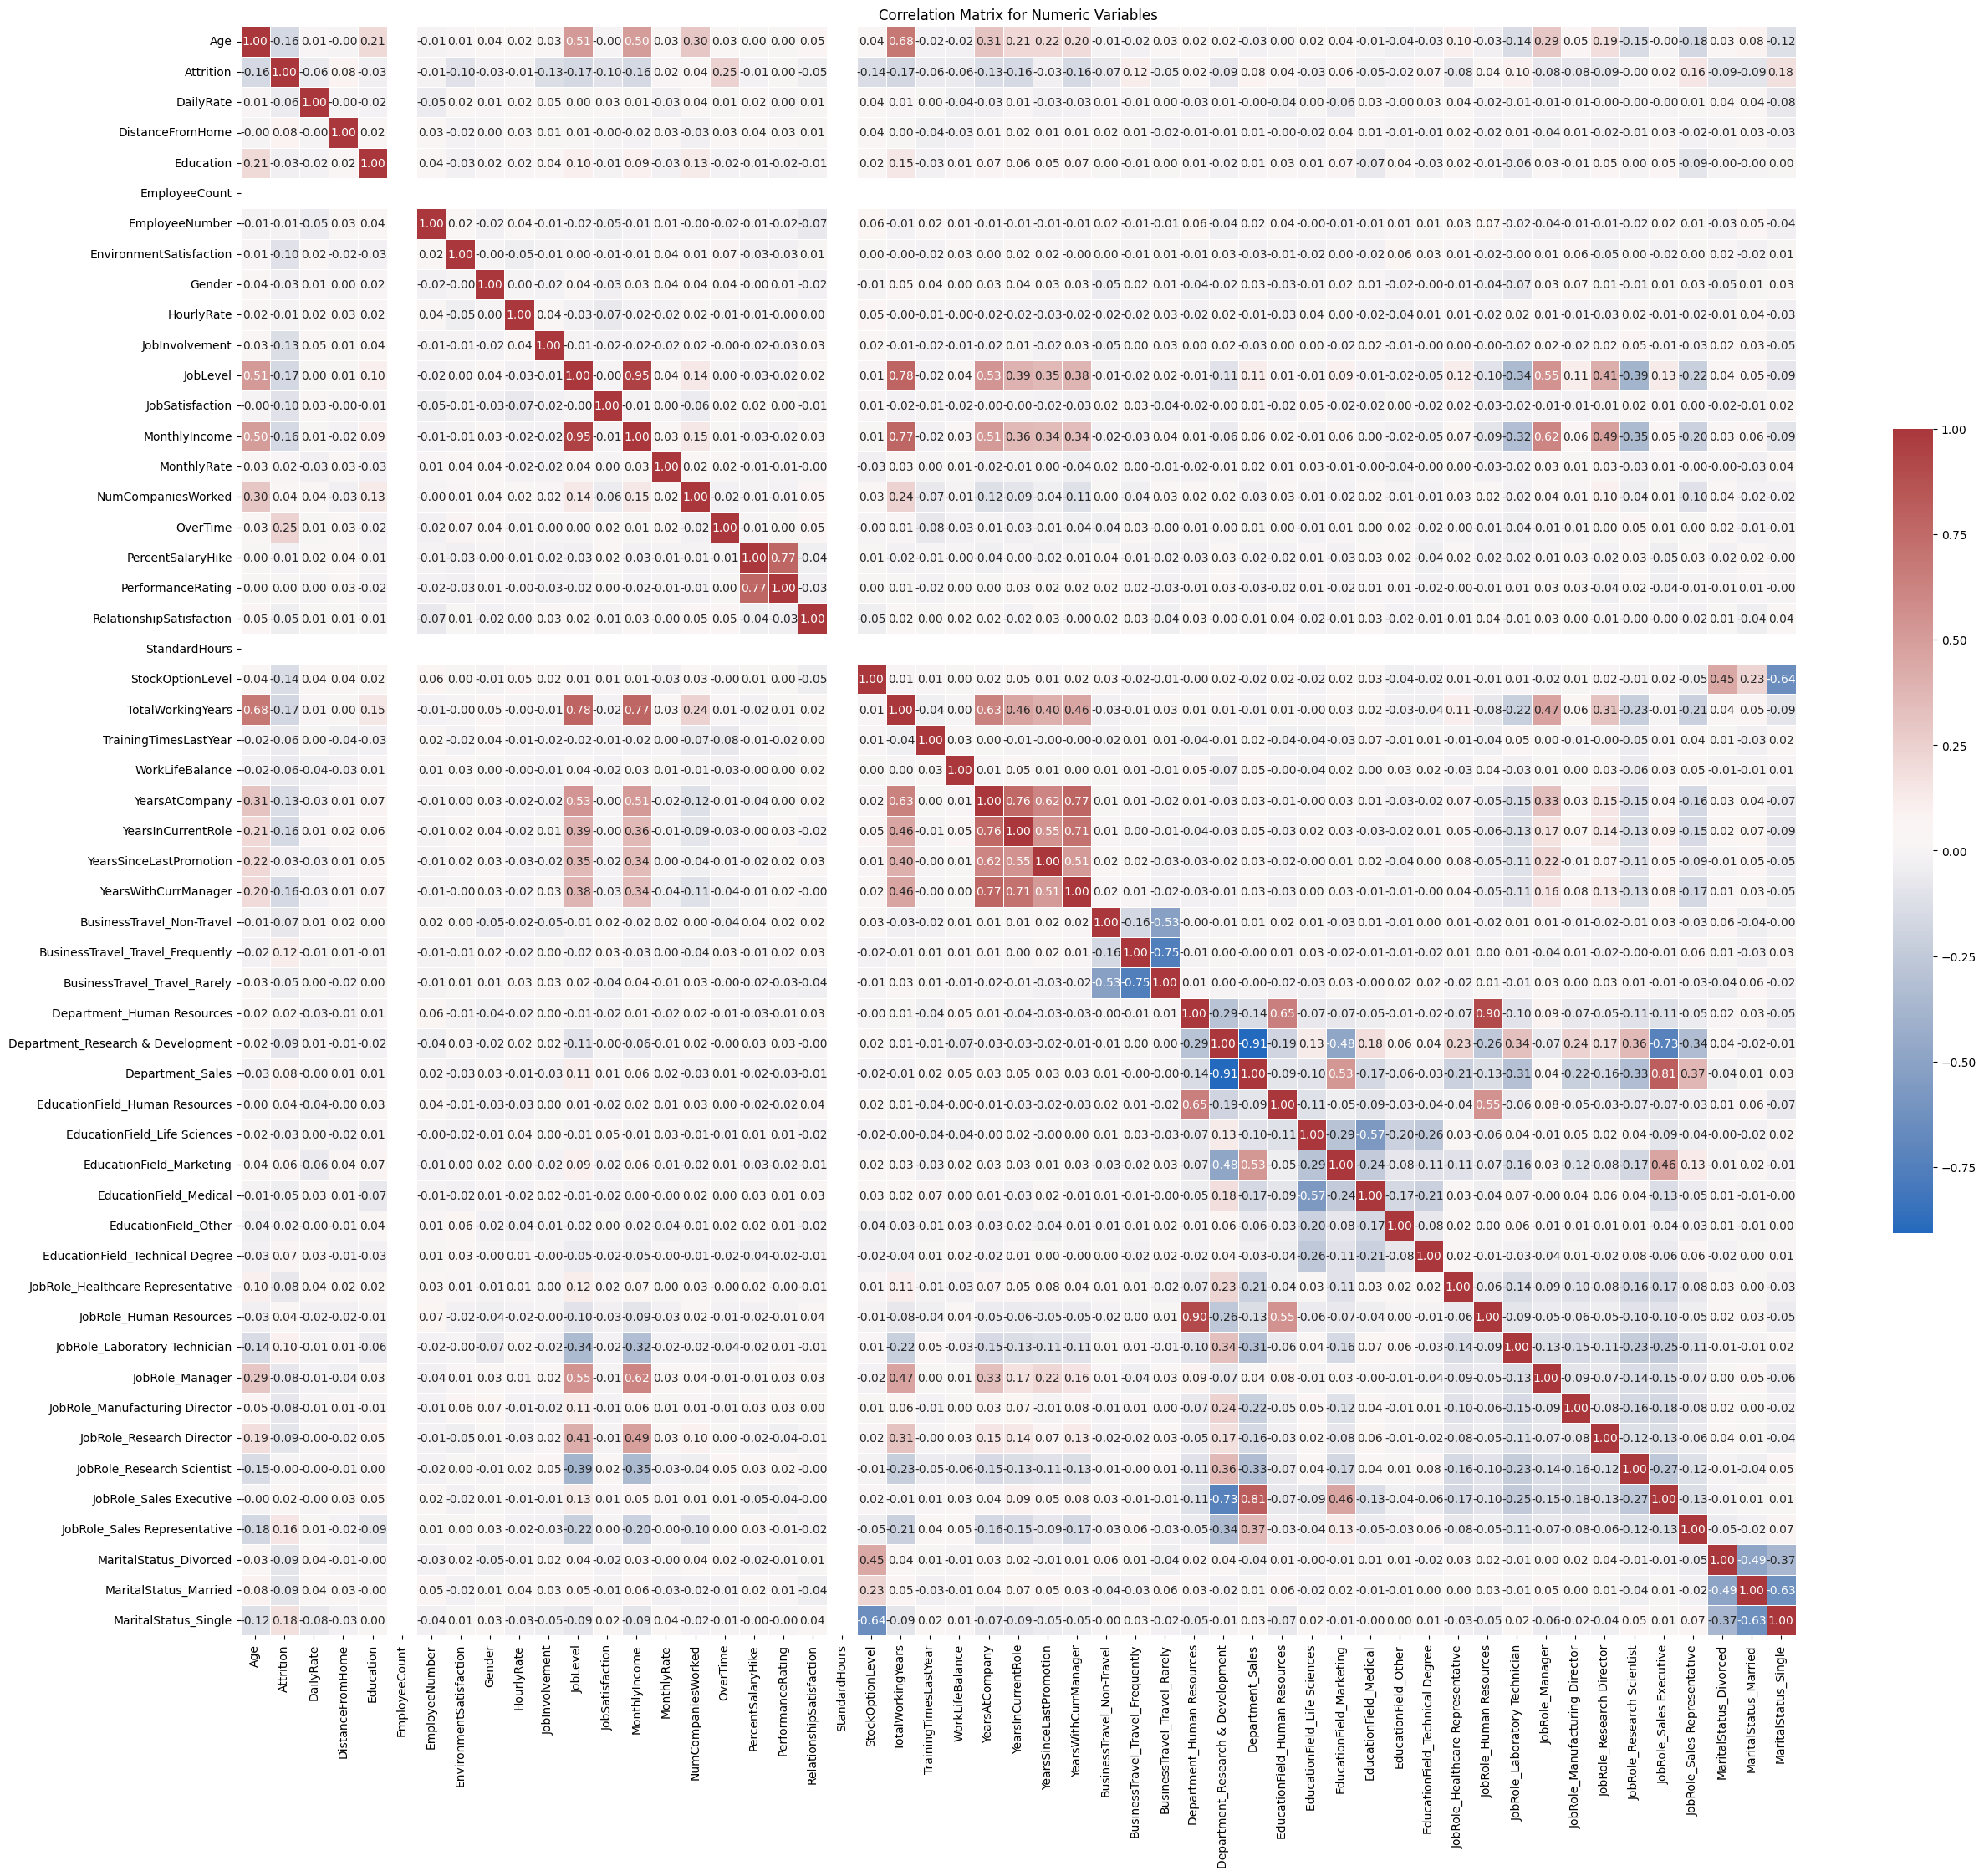

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

#calculate the correlation matrix
corr_matrix = hr_num.corr()

#plot the heatmap
plt.figure(figsize=(30, 25))  
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='vlag', linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Correlation Matrix for Numeric Variables')
plt.show()

What pairs have the highest correlation?

In [13]:
import numpy as np

n = 0.37 

#filter out the upper triangle and diagonal of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

#pairs where correlation is above the threshold
high_corr_pairs = corr_matrix.where(mask).stack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > n]

print(high_corr_pairs.sort_values(by='Correlation', ascending=False))

                           Variable1                       Variable2  \
456                         JobLevel                   MonthlyIncome   
1074      Department_Human Resources         JobRole_Human Resources   
1117                Department_Sales         JobRole_Sales Executive   
464                         JobLevel               TotalWorkingYears   
680                PercentSalaryHike               PerformanceRating   
541                    MonthlyIncome               TotalWorkingYears   
899                   YearsAtCompany            YearsWithCurrManager   
897                   YearsAtCompany              YearsInCurrentRole   
925               YearsInCurrentRole            YearsWithCurrManager   
19                               Age               TotalWorkingYears   
1067      Department_Human Resources  EducationField_Human Resources   
812                TotalWorkingYears                  YearsAtCompany   
563                    MonthlyIncome                 JobRole_Man

Plot a histogram for each numerical attribute to get a feel for the data. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

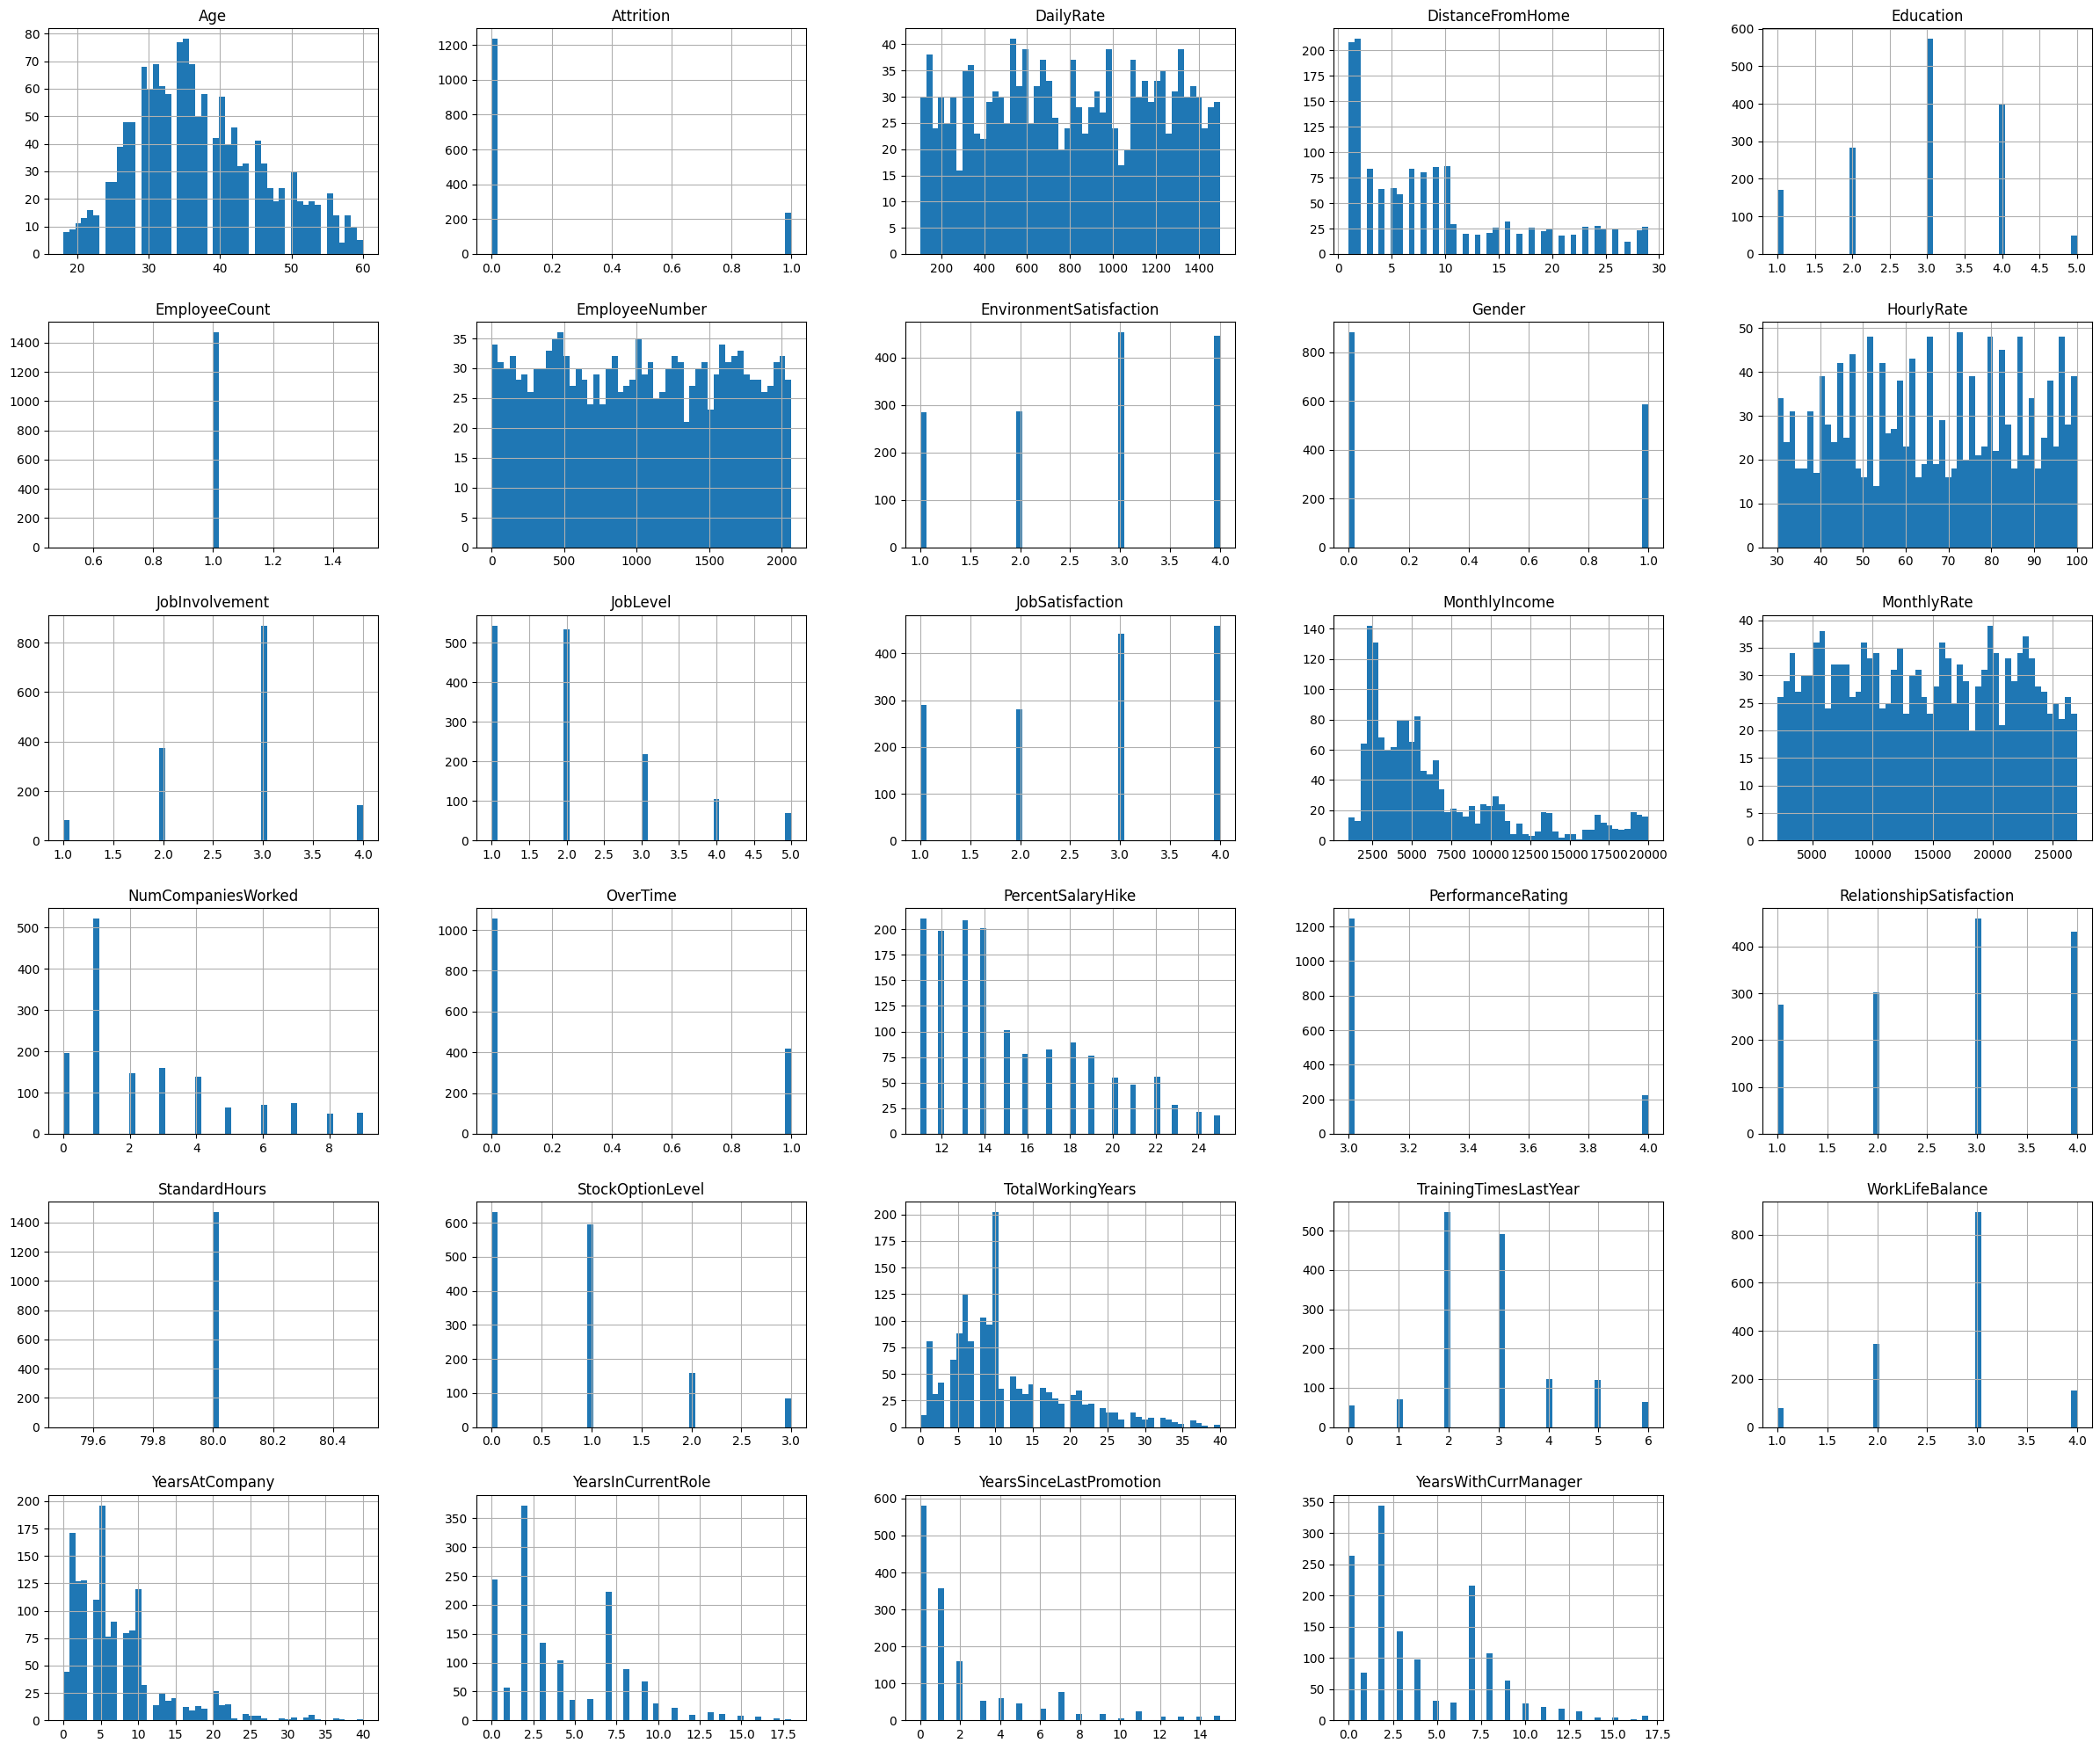

In [14]:
#plot a histogram for each numerical attribute. 
hr_num.hist(bins=50, figsize=(30,25))
plt.show()

### 2. Comparing DistanceFromHome and Attrition  
Does DistanceFromHome have an impact on Attrition?

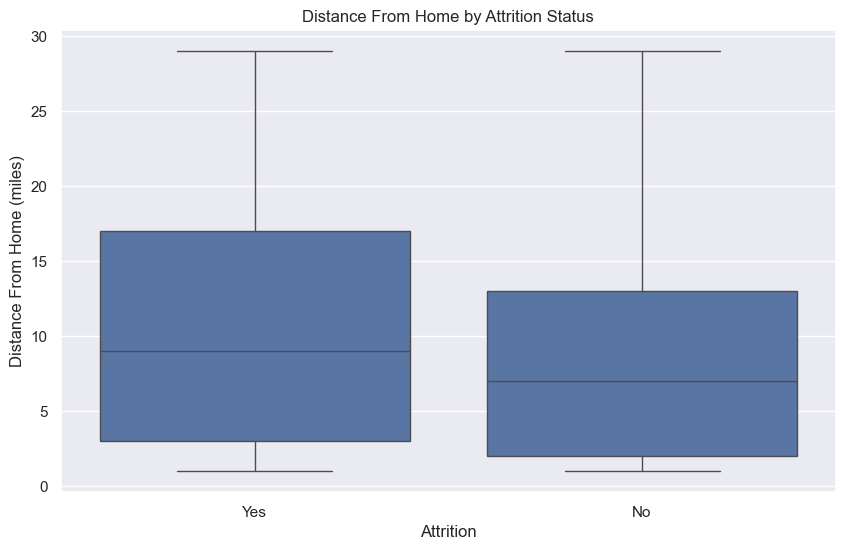

In [15]:
#set style of plot
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6)) 
sb.boxplot(x='Attrition', y='DistanceFromHome', data=hr)

plt.title('Distance From Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home (miles)')
plt.show()

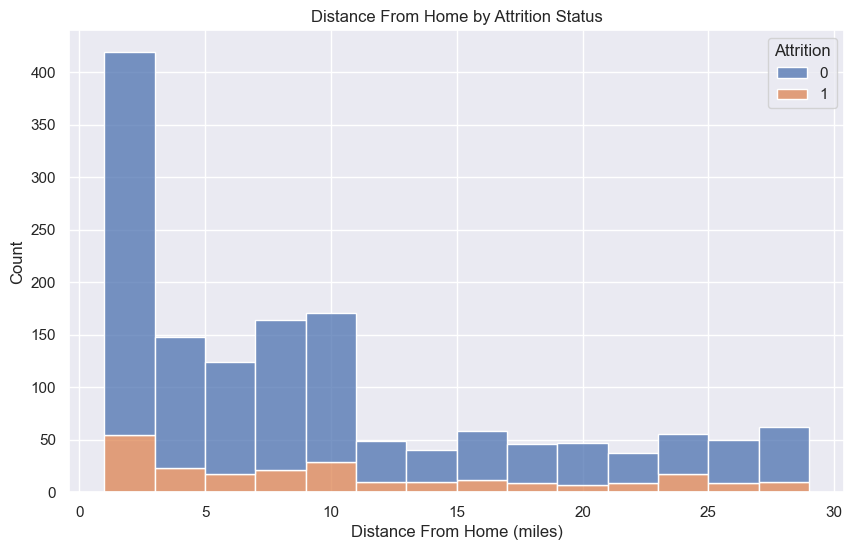

In [16]:
plt.figure(figsize=(10, 6))
sb.histplot(data=hr_attrition_num, x='DistanceFromHome', hue='Attrition', multiple='stack')

plt.title('Distance From Home by Attrition Status')
plt.xlabel('Distance From Home (miles)')
plt.ylabel('Count')
plt.show()


⭐DistanceFromHome does not seem to contribute to attrition on its own. Of note, this is from an absolute numerical perspective.

#### What percent of people leave from each distance category?

In [17]:
hr_num['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

Place distances in bins

In [18]:
max_distance = hr['DistanceFromHome'].max()

#define distance categories
bins = [0, 5, 10, 15, 20, 25, max(hr_num['DistanceFromHome'])+1]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', f'Max: 25-{max_distance}']
hr_num['DistanceCategory'] = pd.cut(hr_num['DistanceFromHome'], bins=bins, labels=labels, right=False)

#calculate attrition rate by distance category
attrition_rate_by_distance = hr_num.groupby('DistanceCategory', observed=False)['Attrition'].mean()

print(attrition_rate_by_distance)

DistanceCategory
0-5           0.135802
6-10          0.150134
11-15         0.177143
16-20         0.190476
21-25         0.256410
Max: 25-29    0.169643
Name: Attrition, dtype: float64


⭐The percentages of attrition seem to increase as distance grows with the exception of the max category. 📝Why?

📝Explore what's going on with Max range

Create a new column that indicates if this person is in the max range (25 - 29) in DistanceFromHome and then look at a heatmap to see what other factors contributing to the max range being lowest

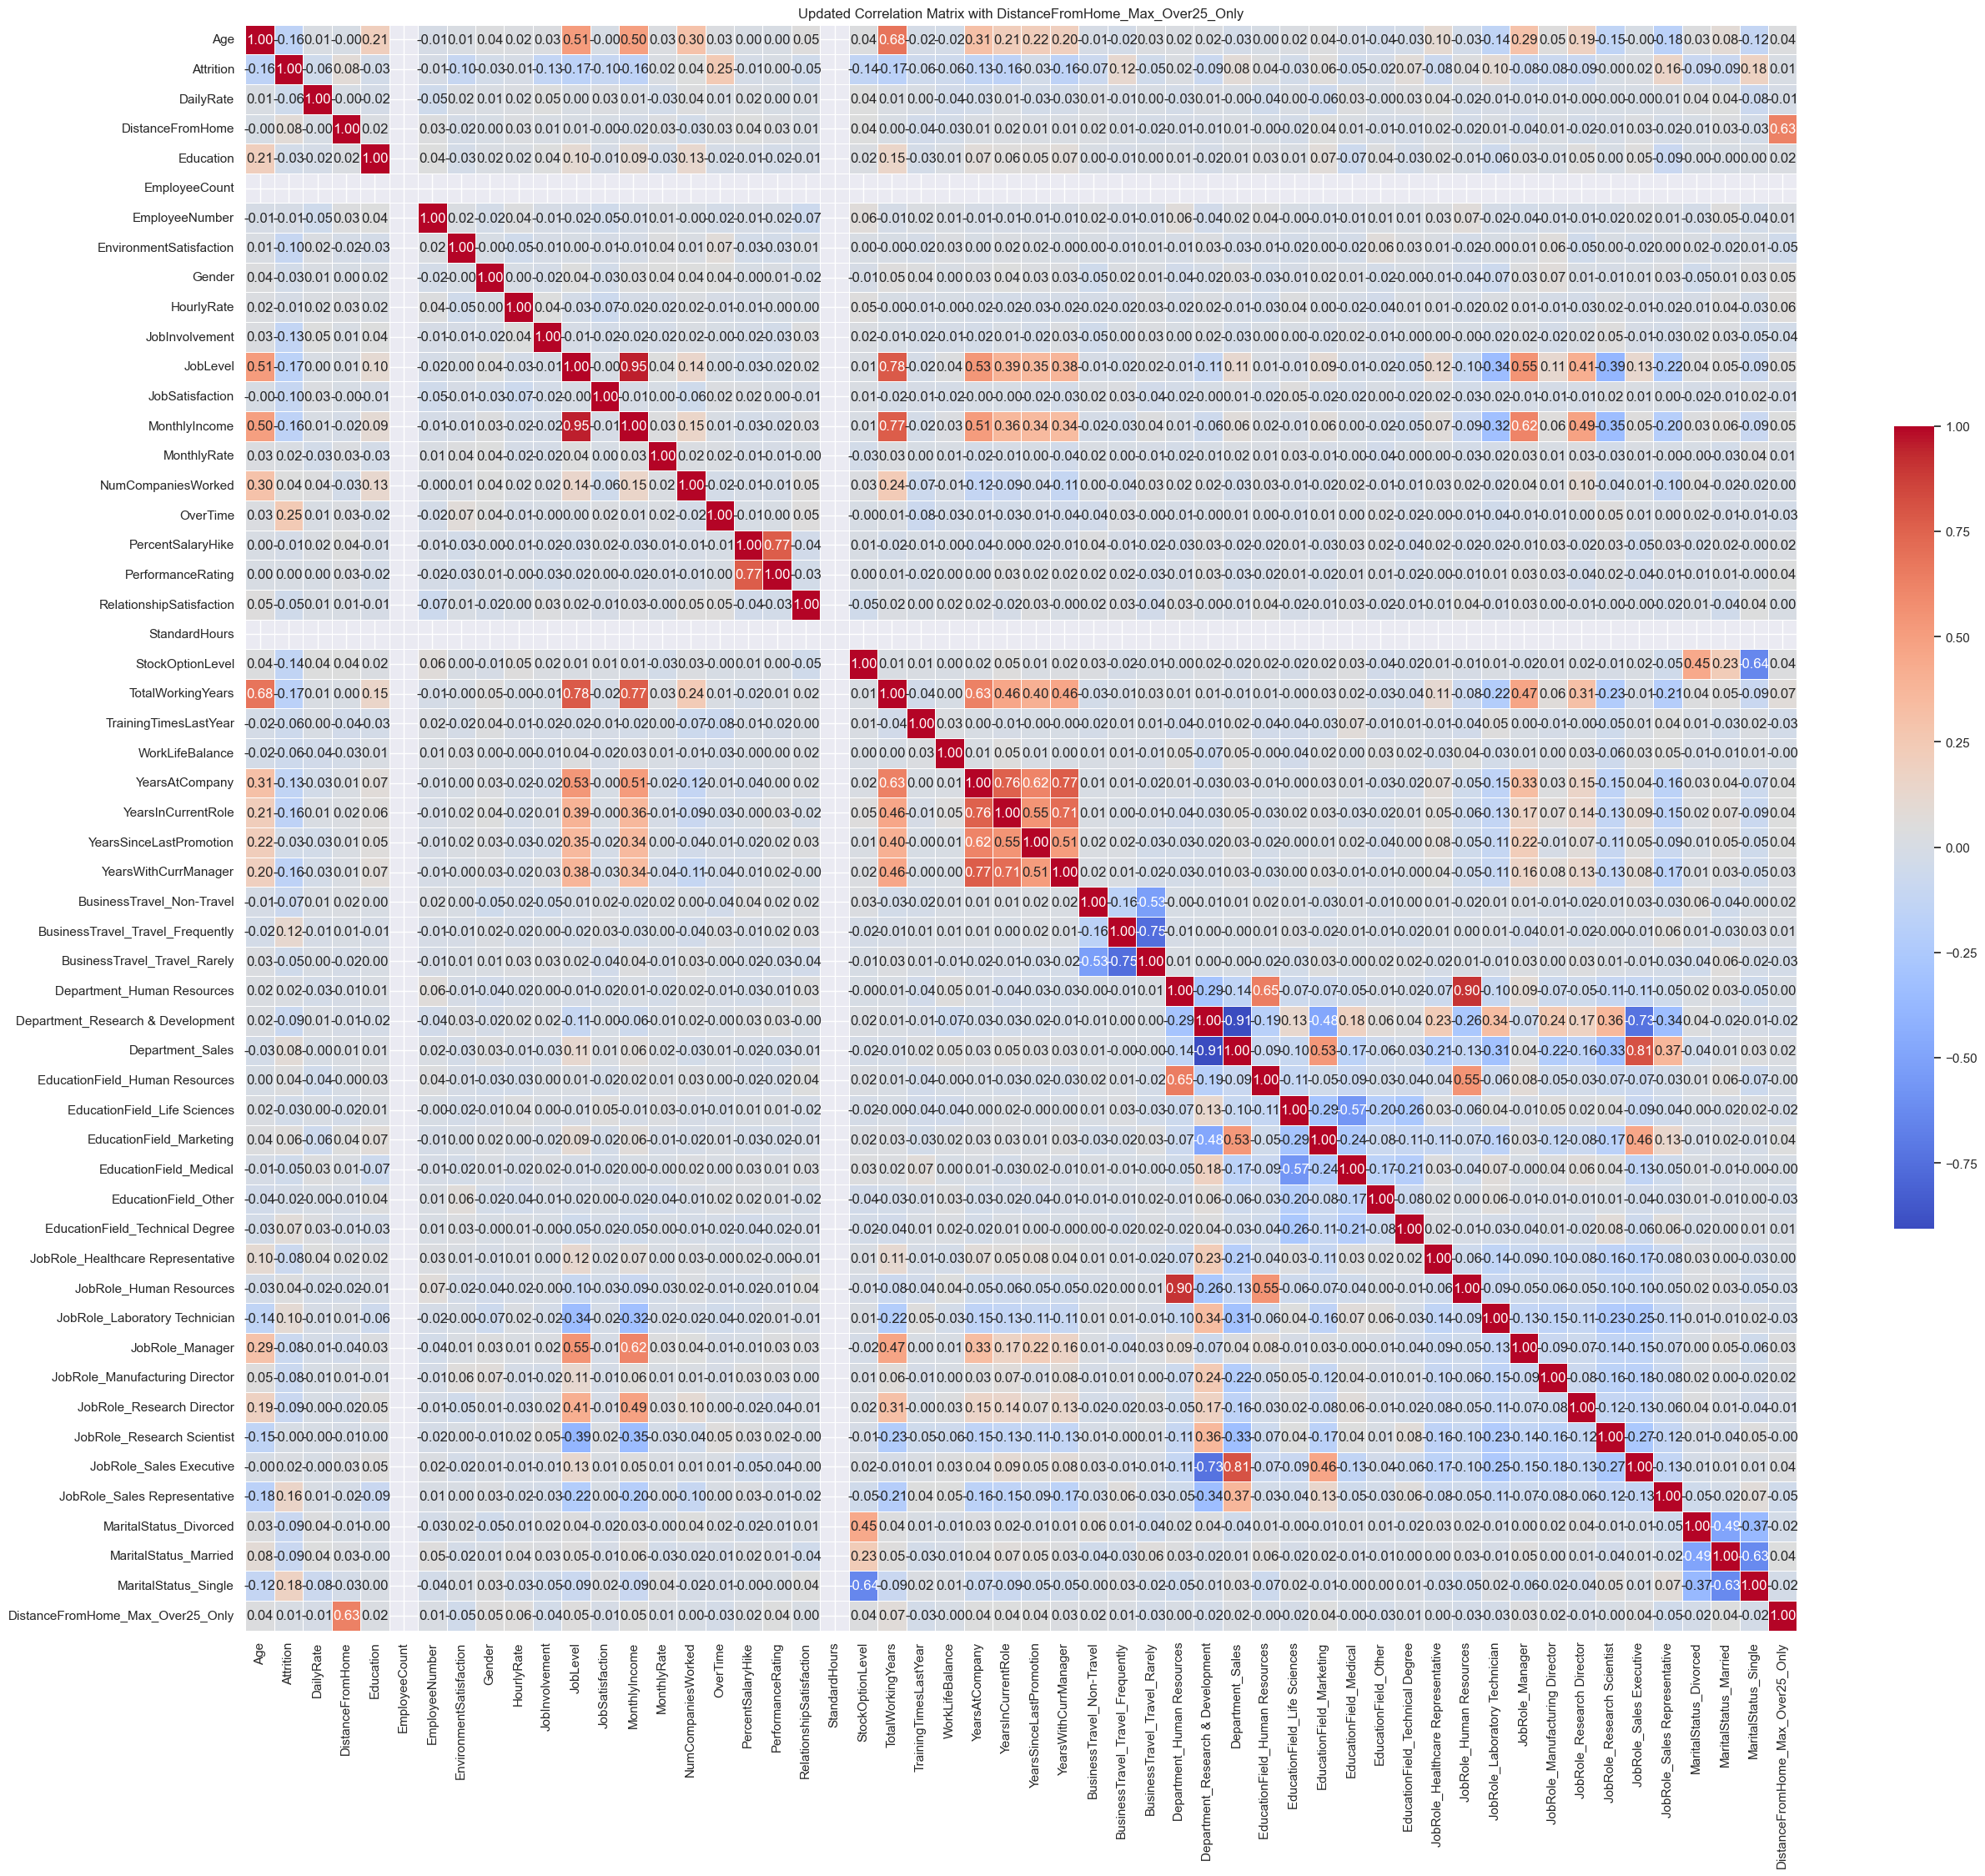

In [19]:
#Dropping categorical 'IncomeBin' and 'DistanceCategory' columns
hr_num = hr_num.drop(['IncomeBin', 'DistanceCategory'], axis=1, errors='ignore') #comment this out later as it will cause an issue?

#create a new column 'DistanceFromHome_Max_Over25_Only' for the 25-29 miles range
#hr_num['DistanceFromHomeMax'] = hr_num['DistanceFromHome'].apply(lambda x: 1 if 25 <= x <= 29 else 0)
hr_num['DistanceFromHome_Max_Over25_Only'] = ((hr_num['DistanceFromHome'] >= 25) & (hr_num['DistanceFromHome'] <= 29)).astype(int)
#calculate the new correlation matrix
corr_matrix_max_distance = hr_num.corr()
#plot the heatmap
plt.figure(figsize=(30, 25)) 
sb.heatmap(corr_matrix_max_distance, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Updated Correlation Matrix with DistanceFromHome_Max_Over25_Only')
plt.show()

In [20]:
#in case we need to check again later
for col in hr_num.columns:
    if hr_num[col].dtype not in ['int64', 'float64', 'bool']:
        print(f"Column '{col}' data type: {hr_num[col].dtype}")


Column 'DistanceFromHome_Max_Over25_Only' data type: int32


What columns have the highest correlation to DistanceFromHome_Max_Over25_Only?

In [21]:
n = 0.034  #threshold for correlation

#filter out correlations related to 'DistanceFromHome_Max_Over25_Only' and above the threshold
corr_with_distance = corr_matrix_max_distance['DistanceFromHome_Max_Over25_Only'].drop('DistanceFromHome_Max_Over25_Only')
high_corr_vars = corr_with_distance[abs(corr_with_distance) >= n].reset_index()
high_corr_vars.columns = ['Variable', 'Correlation']

#print the variables with correlation above the threshold with 'DistanceFromHome_Max_Over25_Only'
print(high_corr_vars.sort_values(by='Correlation', ascending=False))

                        Variable  Correlation
1               DistanceFromHome     0.631672
10             TotalWorkingYears     0.069125
4                     HourlyRate     0.055414
3                         Gender     0.053387
6                       JobLevel     0.052921
7                  MonthlyIncome     0.046453
13       YearsSinceLastPromotion     0.042960
11                YearsAtCompany     0.042322
8              PerformanceRating     0.041095
12            YearsInCurrentRole     0.040583
14      EducationField_Marketing     0.040335
17         MaritalStatus_Married     0.039751
0                            Age     0.038616
15       JobRole_Sales Executive     0.038032
9               StockOptionLevel     0.036382
5                 JobInvolvement    -0.035155
2        EnvironmentSatisfaction    -0.046552
16  JobRole_Sales Representative    -0.048034


Let's look at this visually

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\1682254208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Correlation', y='Variable', data=high_corr_vars.sort_values(by='Correlation', key=abs, ascending=False), palette="vlag")


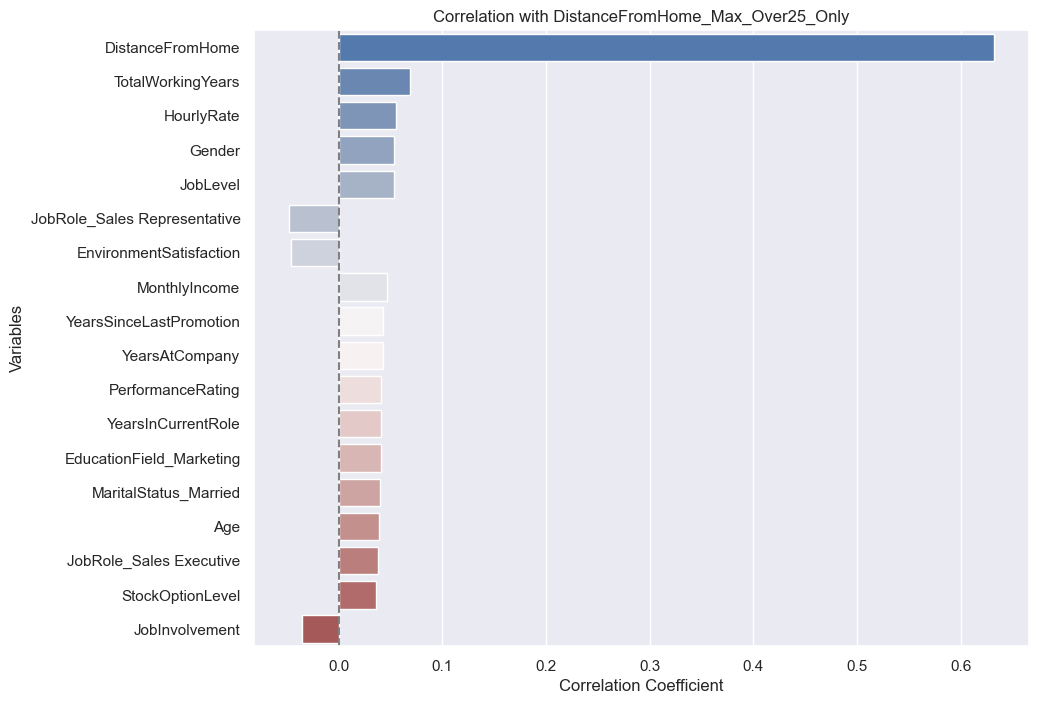

In [22]:
plt.figure(figsize=(10, 8))
#create a bar plot, sorting values by 'Correlation' magnitude for visualization
sb.barplot(x='Correlation', y='Variable', data=high_corr_vars.sort_values(by='Correlation', key=abs, ascending=False), palette="vlag")

plt.title('Correlation with DistanceFromHome_Max_Over25_Only')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='grey', linestyle='--') 

plt.show()

Compare all of the columns of interest against DistanceFromHome_Max_Over25_Only

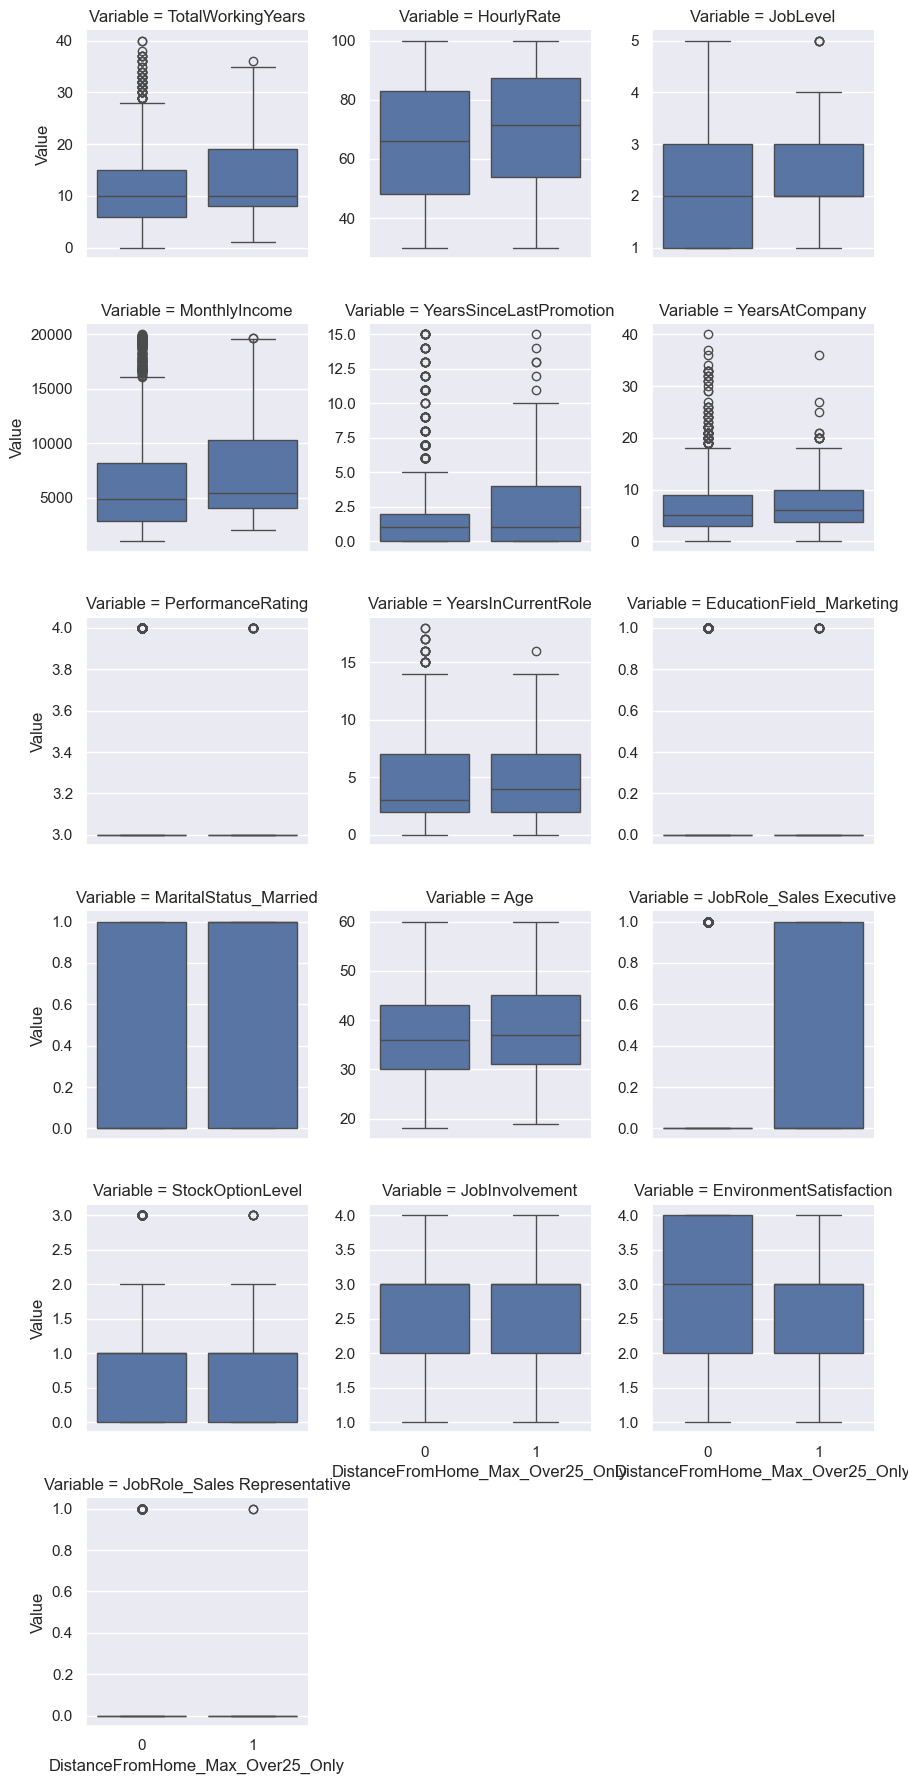

In [23]:
#interesting features in my correlation analysis
variables_of_interest = ['TotalWorkingYears', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'YearsSinceLastPromotion', 
                         'YearsAtCompany', 'PerformanceRating', 'YearsInCurrentRole', 'EducationField_Marketing', 'MaritalStatus_Married',
                          'Age', 'JobRole_Sales Executive', 'StockOptionLevel','JobInvolvement', 'EnvironmentSatisfaction', 'JobRole_Sales Representative' ]

#Melt the DataFrame to long-format for easier plotting with seaborn
hr_long = hr_num.melt(id_vars='DistanceFromHome_Max_Over25_Only', value_vars=variables_of_interest, var_name='Variable', value_name='Value')

#Create a FacetGrid boxplot for each variable
g = sb.FacetGrid(hr_long, col='Variable', col_wrap=3, sharey=False)
g.map(sb.boxplot, 'DistanceFromHome_Max_Over25_Only', 'Value', order=[0, 1])

plt.show()


So these are all of the columns that may have a contributing factor. Remarkable is: 
- Decreased Environment Satisfaction when not in max range, 
- Make slightly more when they live in the max range, and
- Sales Executive.

EnvironmentSatisfaction is higher for those who do not live in the max range.                                     

📝Explore EnvironmentSatisfaction and DistanceFromHome further?

### 2a. Take a look from an absolute numerical perspective.

#### Job roles of the people who have and have not quit in the max range.

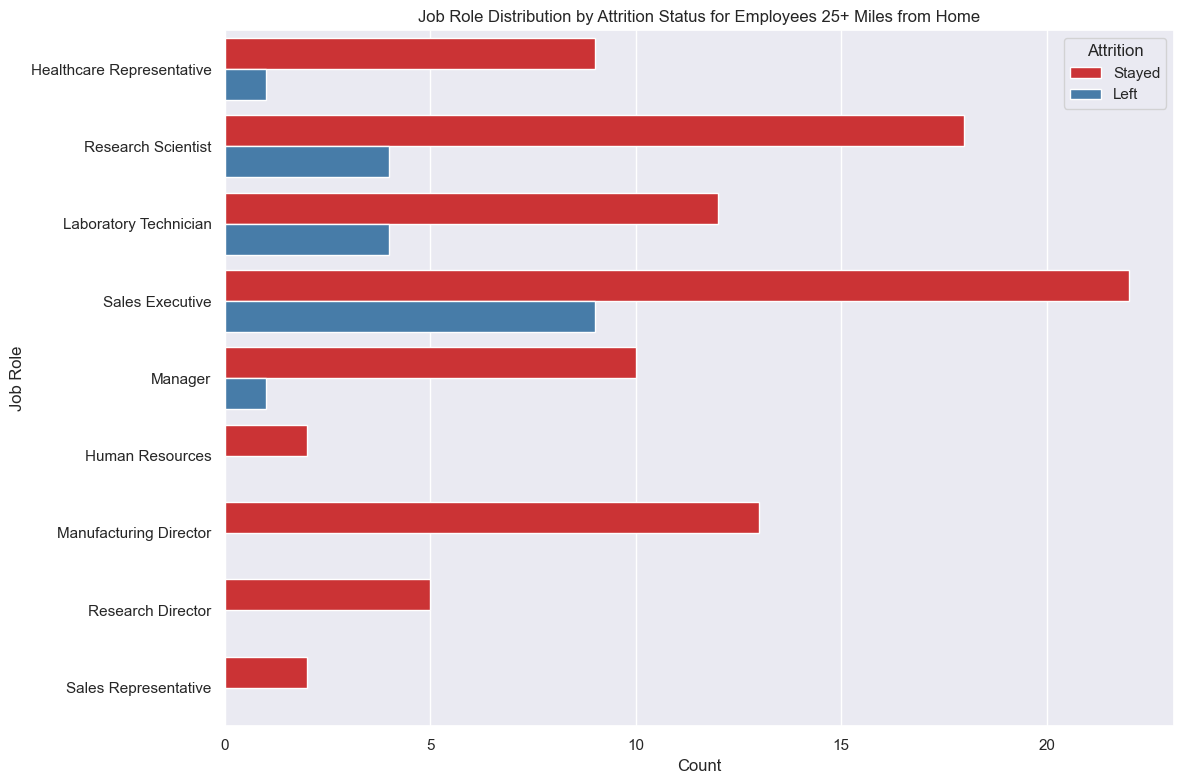

In [24]:
#filter the DataFrame for employees within the 25-max_distance range
hr_filtered = hr[(hr['DistanceFromHome'] >= 25) & (hr['DistanceFromHome'] <= max_distance)]

#visualization
plt.figure(figsize=(12, 8))
sb.countplot(y='JobRole', hue='Attrition', data=hr_filtered, palette='Set1')

plt.title('Job Role Distribution by Attrition Status for Employees 25+ Miles from Home')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()


#### Attrition rate per Job Role (absolute numerical)

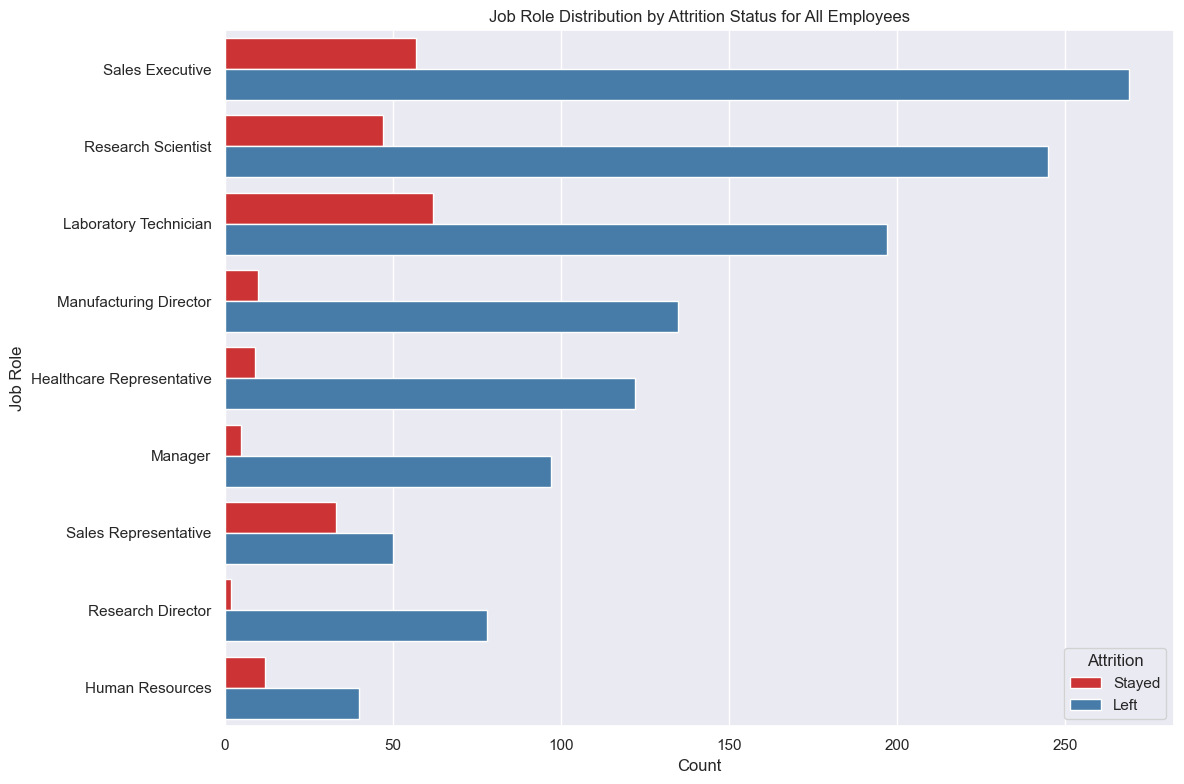

In [25]:
plt.figure(figsize=(12, 8))
sb.countplot(y='JobRole', hue='Attrition', data=hr, palette='Set1')

plt.title('Job Role Distribution by Attrition Status for All Employees')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

So we can see it is mostly Sales Executives who are more likely to leave anyway from a numbers perspective. We can explore more about this.

📝Explore Job Roles (Left) and Number of Years at Company, SalaryHike, Environment Satisfaction, etc.

### 1b. Let's look at it proportionally rather than using absolute numbers.

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\3104352937.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')


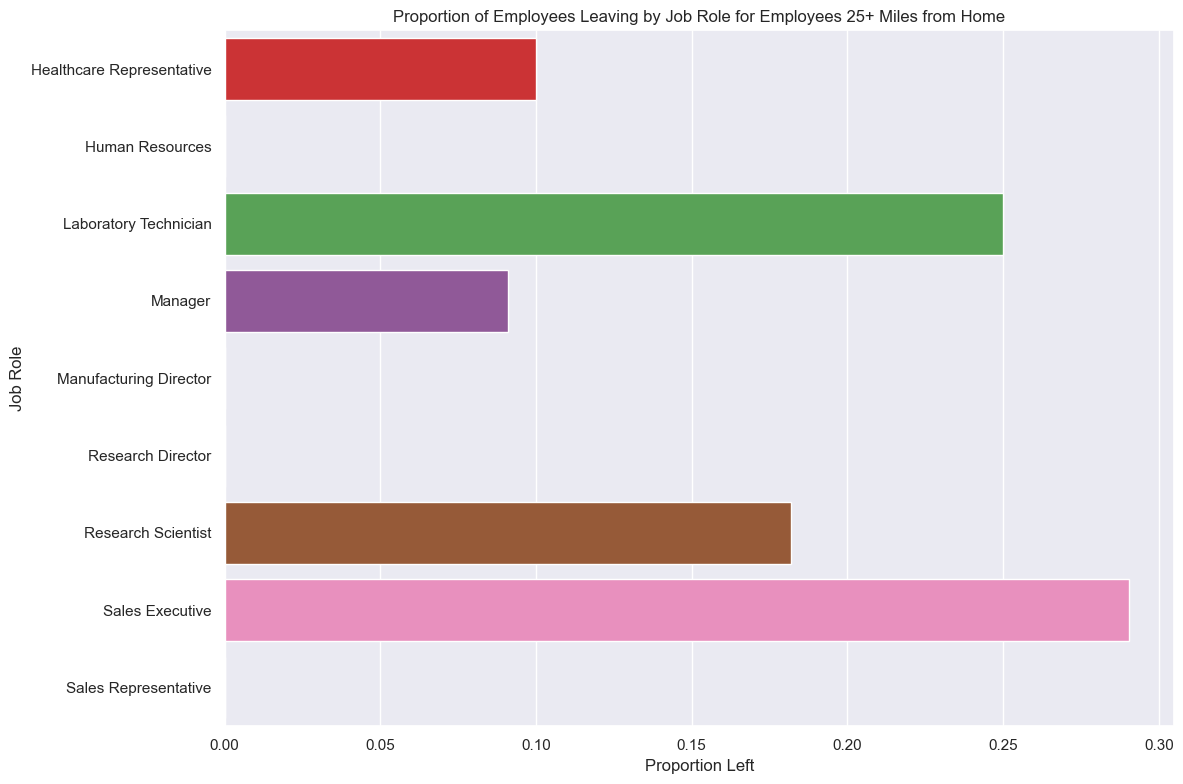

In [26]:
#filter the DataFrame for employees within the 25-max_distance range
hr_max_distance_filtered = hr_attrition_num[(hr_attrition_num['DistanceFromHome'] >= 25) & (hr_attrition_num['DistanceFromHome'] <= max_distance)]

#create a DataFrame to hold counts
job_role_attrition = hr_max_distance_filtered.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
#calculate proportions
#job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])
job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])

#reset index for plotting
job_role_proportions = job_role_attrition['Proportion'].reset_index()

#visualization
plt.figure(figsize=(12, 8))
sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')
#sb.barplot(y='hue', x='Proportion', data=job_role_proportions, palette='Set1', legend =False)

plt.title('Proportion of Employees Leaving by Job Role for Employees 25+ Miles from Home')
plt.xlabel('Proportion Left')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()


### Now compared to everyone, no matter the Distance from Home.

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\2003541244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')


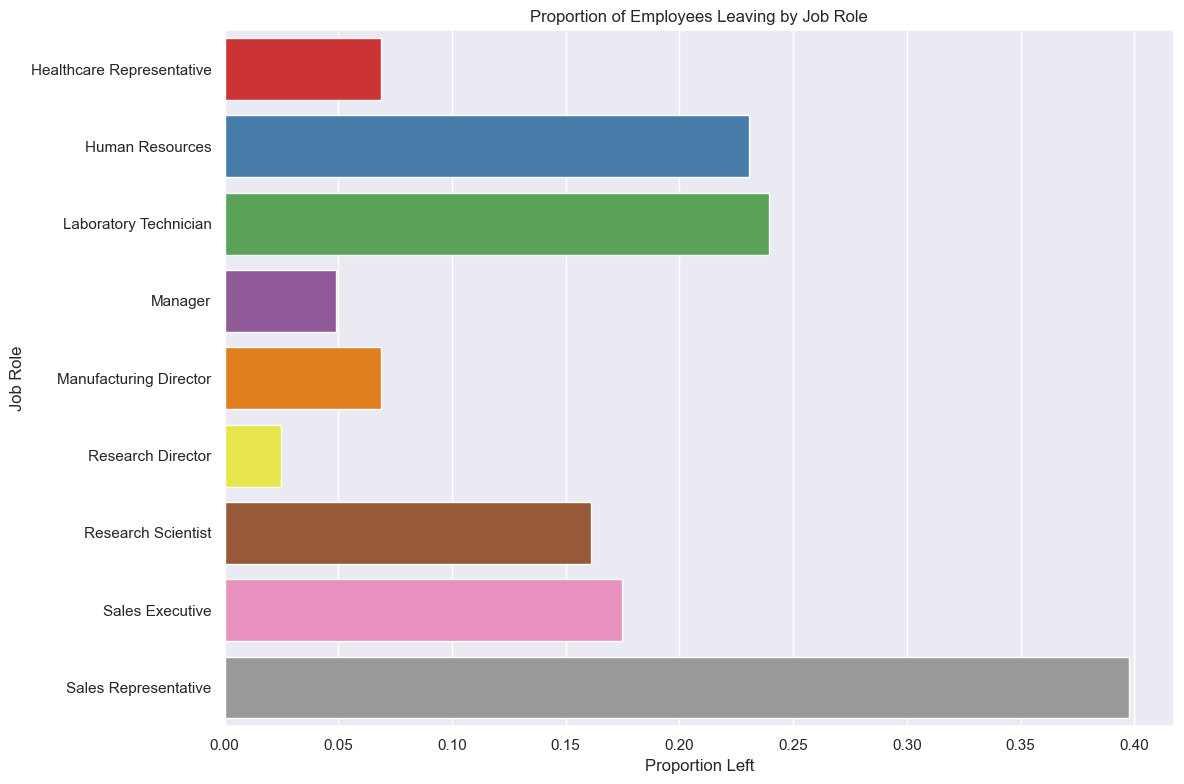

In [27]:
#create a DataFrame to hold counts
job_role_attrition = hr_attrition_num.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
#calculate proportions
#job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])
job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])

#reset index for plotting
job_role_proportions = job_role_attrition['Proportion'].reset_index()

#visualization
plt.figure(figsize=(12, 8))
sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')
#sb.barplot(y='hue', x='Proportion', data=job_role_proportions, palette='Set1', legend =False)

plt.title('Proportion of Employees Leaving by Job Role')
plt.xlabel('Proportion Left')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()

While Sales Representatives are most likely to leave, DistanceFromHome may have an influence on this. We can explore the data some more to see if there any other indicators.

As for Laboratory Technicians, data from both show that they are leaving at a high rate. This could simply indicate that the department does not have a good retention rate for internal reasons, or there are just external factors such a favorable job market. We will explore the Lab Tech position more before making any conclusions.

### 3. How does salary, raises, promotions, etc. play a role?

In [28]:
hr["MonthlyIncome"].value_counts()

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

In [29]:
hr["PercentSalaryHike"].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\4255179606.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_hike_by_bin = hr_num_filtered.groupby('IncomeBin')['PercentSalaryHike'].mean()


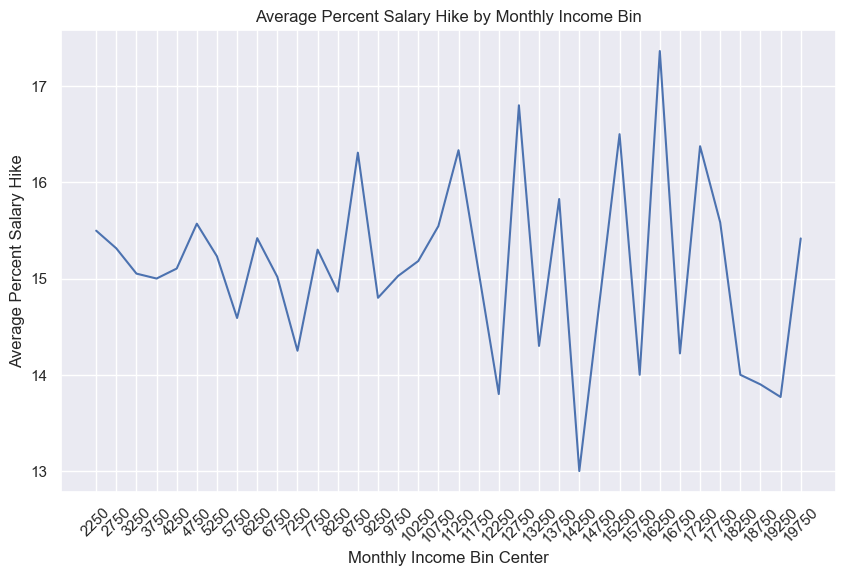

In [30]:
#create bins for Monthly Income
income_bins = np.arange(2000, hr['MonthlyIncome'].max() + 500, 500)
hr_num['IncomeBin'] = pd.cut(hr_num['MonthlyIncome'], bins=income_bins, include_lowest=True)

#filter data for Percent Salary Hike between 11 and 25
hr_num_filtered = hr_num[(hr_num['PercentSalaryHike'] >= 11) & (hr_num['PercentSalaryHike'] <= 25)]

#calculate the mean Percent Salary Hike for each income bin
bin_centers = 0.5 * (income_bins[:-1] + income_bins[1:])
mean_salary_hike_by_bin = hr_num_filtered.groupby('IncomeBin')['PercentSalaryHike'].mean()

plt.figure(figsize=(10, 6))
sb.lineplot(x=bin_centers, y=mean_salary_hike_by_bin.values)

plt.title('Average Percent Salary Hike by Monthly Income Bin')
plt.xlabel('Monthly Income Bin Center')
plt.ylabel('Average Percent Salary Hike')
plt.xticks(bin_centers, rotation=45)
plt.show()


📝I wonder how JobRole/Department plays a role on the above?

Comparing Years Since Last Promotion and Years with Current Manager to see if there is a correlation.

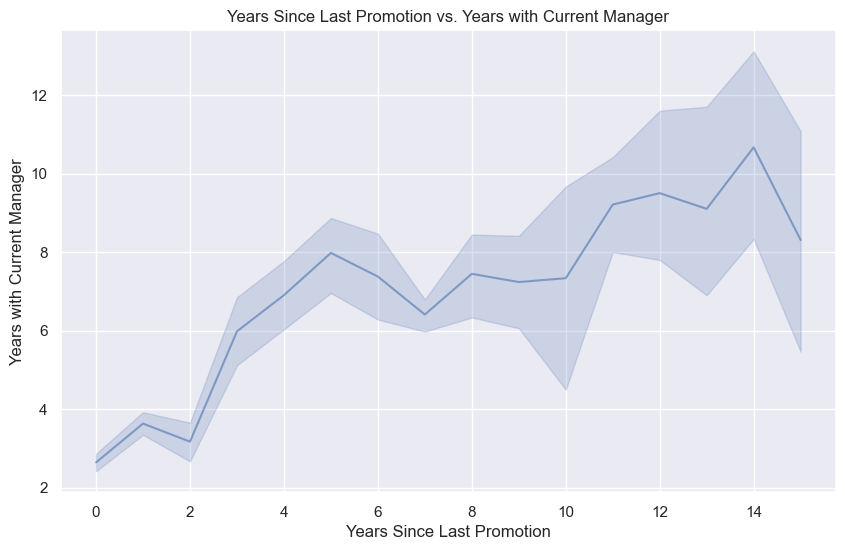

In [31]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sb.lineplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', data=hr, alpha=0.6)

plt.title('Years Since Last Promotion vs. Years with Current Manager')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years with Current Manager')
plt.show()


Differentiate the above by attrition.

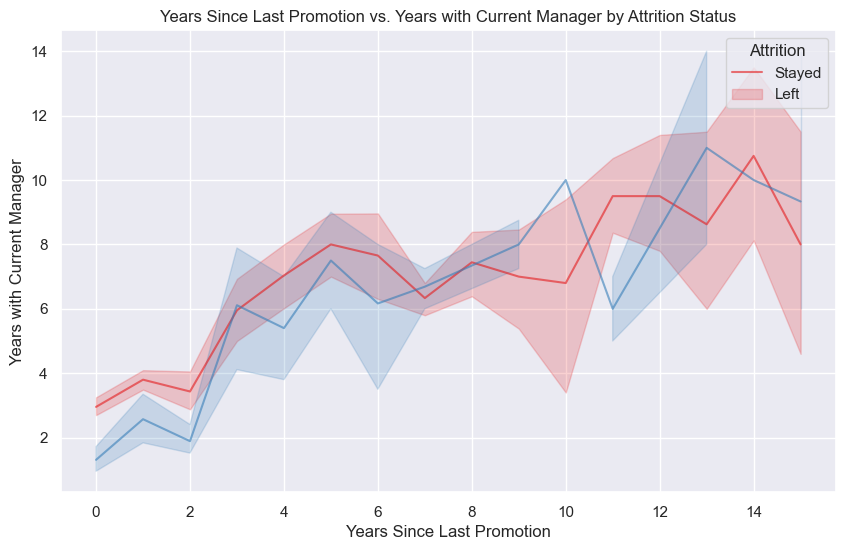

In [32]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))

#use the hue parameter to differentiate between Attrition = 0 and Attrition = 1
sb.lineplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', hue='Attrition', data=hr_attrition_num, alpha=0.6, palette='Set1')

plt.title('Years Since Last Promotion vs. Years with Current Manager by Attrition Status')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years with Current Manager')

#add legend to clarify the lines
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.show()


Years Since Last Promotion and Job Satisfaction

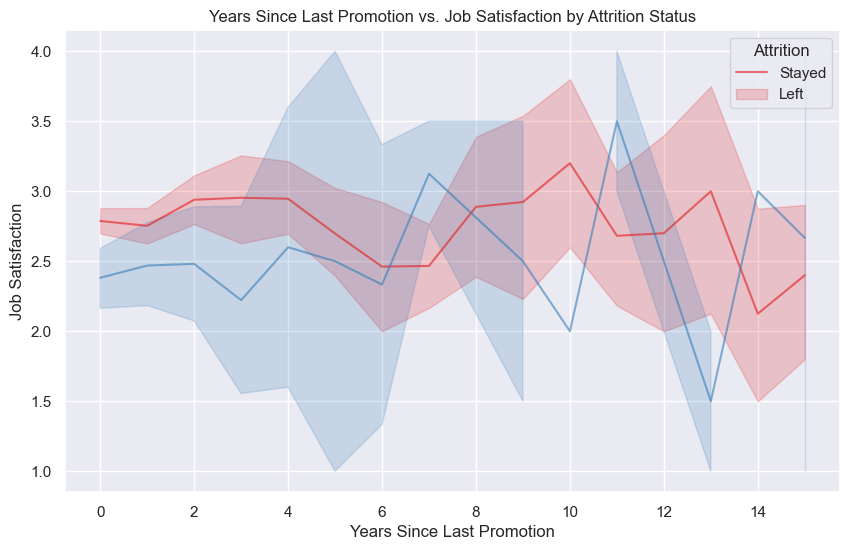

In [33]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))

#use the hue parameter to differentiate between Attrition = 0 and Attrition = 1
sb.lineplot(x='YearsSinceLastPromotion', y='JobSatisfaction', hue='Attrition', data=hr_attrition_num, alpha=0.6, palette='Set1')

plt.title('Years Since Last Promotion vs. Job Satisfaction by Attrition Status')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Job Satisfaction')

#add legend to clarify the lines
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.show()

Comparing Performance Rating and Years with Current Manager to see if there is a correlation.

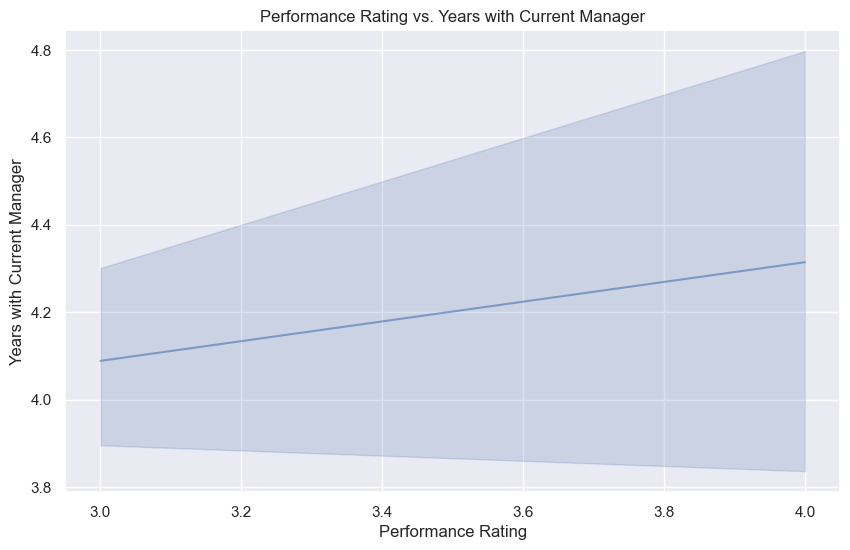

In [34]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sb.lineplot(x='PerformanceRating', y='YearsWithCurrManager', data=hr, alpha=0.6)

plt.title('Performance Rating vs. Years with Current Manager')
plt.xlabel('Performance Rating')
plt.ylabel('Years with Current Manager')
plt.show()

### 4. Does Gender play a role?

Gender and Attrition Rate

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\1755640895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Gender', y='Attrition', data=hr_num, palette='pastel')


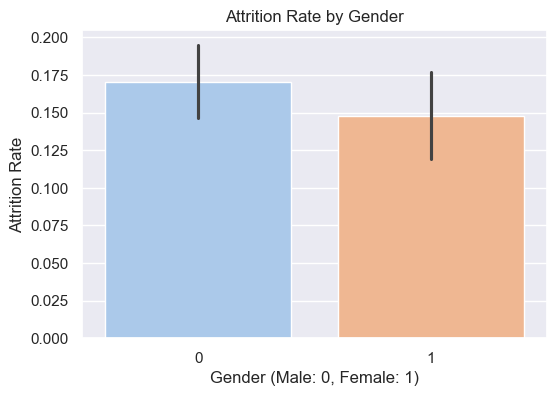

In [35]:
#create a bar plot to visualize attrition rates by gender
plt.figure(figsize=(6, 4))
sb.barplot(x='Gender', y='Attrition', data=hr_num, palette='pastel')

plt.title('Attrition Rate by Gender')
plt.xlabel('Gender (Male: 0, Female: 1)')
plt.ylabel('Attrition Rate')
plt.show()


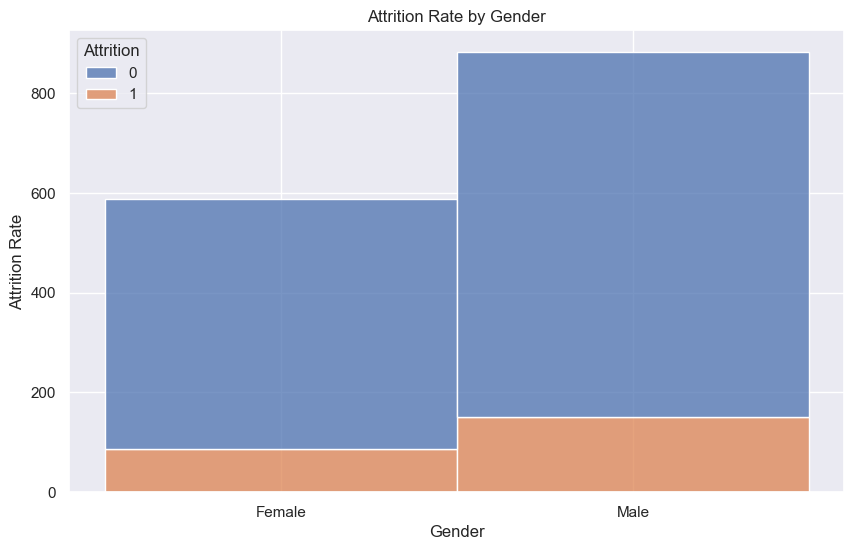

In [36]:
plt.figure(figsize=(10, 6))
sb.histplot(data=hr_attrition_num, x='Gender', hue='Attrition', multiple='stack')

plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.show()

Now from a proportional standpoint.

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\4255443150.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Gender', y='AttritionRate', data=attrition_rate_by_gender_df, palette='pastel')


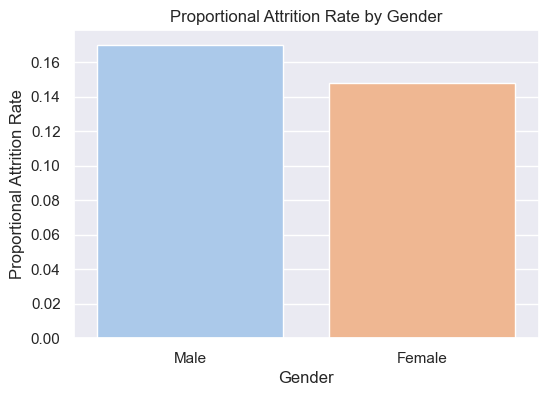

In [37]:
#calculate the number of attritions for each gender
gender_counts = hr_attrition_num['Gender'].value_counts()
attritions_by_gender = hr_attrition_num[hr_attrition_num['Attrition'] == 1]['Gender'].value_counts()

# calculate the proportional attrition rate
attrition_rate_by_gender = attritions_by_gender / gender_counts

#convert the series to a DataFrame for plotting
attrition_rate_by_gender_df = attrition_rate_by_gender.reset_index()
attrition_rate_by_gender_df.columns = ['Gender', 'AttritionRate']


plt.figure(figsize=(6, 4))

#plot the proportional attrition rates
sb.barplot(x='Gender', y='AttritionRate', data=attrition_rate_by_gender_df, palette='pastel')

plt.title('Proportional Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportional Attrition Rate')
plt.show()

Gender and Job Satisfaction

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\2592530537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Gender', y='JobSatisfaction', data=hr_num, palette='pastel')


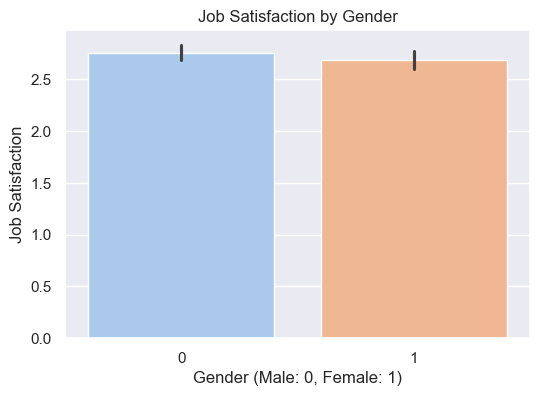

In [38]:
#create a bar plot to visualize attrition rates by gender
plt.figure(figsize=(6, 4))
sb.barplot(x='Gender', y='JobSatisfaction', data=hr_num, palette='pastel')

plt.title('Job Satisfaction by Gender')
plt.xlabel('Gender (Male: 0, Female: 1)')
plt.ylabel('Job Satisfaction')
plt.show()

Gender and Environment Satisfaction

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\105632162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Gender', y='EnvironmentSatisfaction', data=hr_num, palette='pastel')


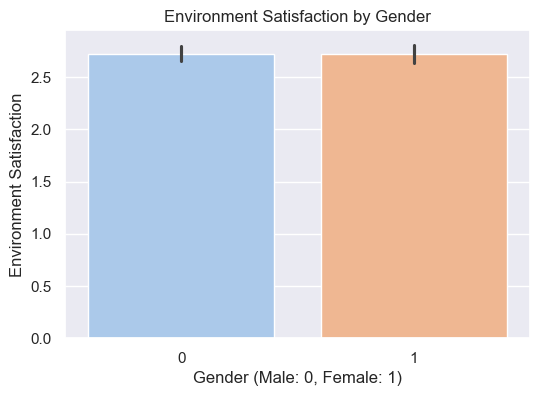

In [39]:
#create a bar plot to visualize attrition rates by gender
plt.figure(figsize=(6, 4))
sb.barplot(x='Gender', y='EnvironmentSatisfaction', data=hr_num, palette='pastel')

plt.title('Environment Satisfaction by Gender')
plt.xlabel('Gender (Male: 0, Female: 1)')
plt.ylabel('Environment Satisfaction')
plt.show()

Calculate the attrition rate per gender for each department

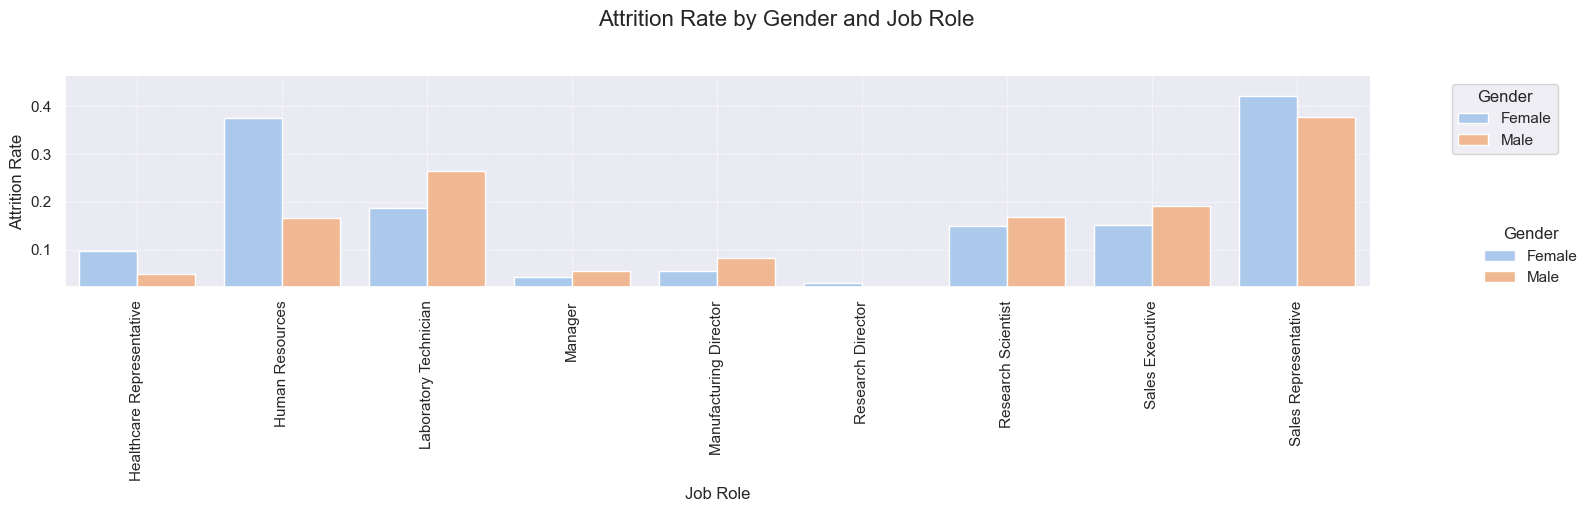

In [40]:
#necessary because seaborn does not calculate rates, you need to provide the specific values you want to plot
attrition_rate = hr_attrition_num.groupby(['JobRole', 'Gender'])['Attrition'].mean().reset_index()

#calculation for attrition rate by Job Role and Gender
g = sb.catplot(
    x='JobRole', 
    y='Attrition', 
    hue='Gender', 
    data=attrition_rate, 
    kind='bar',
    height=5, 
    aspect=3,  
    palette='pastel'
)

#improve the readability
plt.xticks(rotation=90)  

#set the y-axis to start from zero if attrition rate doesn't go below zero and adjust the upper limit to 10% above the maximum attrition rate
plt.ylim(attrition_rate['Attrition'].min(), attrition_rate['Attrition'].max() * 1.1) 

#add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#set the labels and titles and improve formatting
g.set_xlabels('Job Role', fontsize=12)
g.set_ylabels('Attrition Rate', fontsize=12)
g.fig.suptitle('Attrition Rate by Gender and Job Role', y=1.02, fontsize=16)  #adjusts title and position

#adjust legend
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

⭐Female employees in the Human Resources Department quit overwhelming over the Male employees.

📝Why is this? Let's look at Environment Satisfaction and some other factors.

### 5. Age and attrition. Do these findings include people that may be retiring?

I'm not sure when this data was taken, but current retirement age is 67.

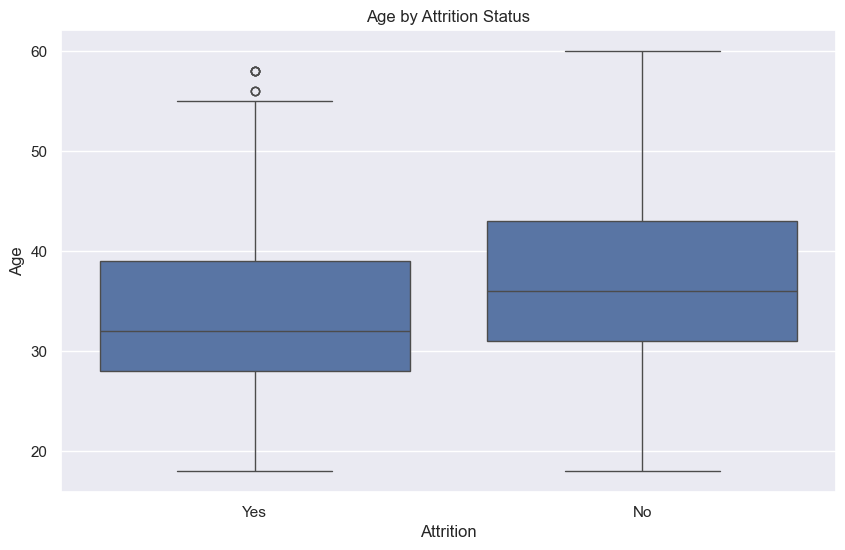

In [41]:
#set style of plot
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6)) 
sb.boxplot(x='Attrition', y='Age', data=hr)

plt.title('Age by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

### 6. Job Satisfaction and Environment Satisfaction

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\2810239954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Attrition', y='JobSatisfaction', data=hr_attrition_num, palette='pastel')


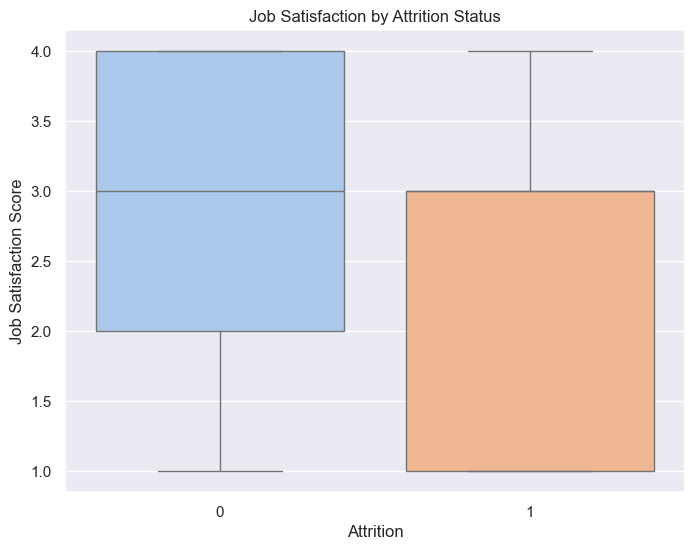

In [42]:
#create a box plot comparing job satisfaction scores between those who left and those who stayed
plt.figure(figsize=(8, 6))
sb.boxplot(x='Attrition', y='JobSatisfaction', data=hr_attrition_num, palette='pastel')

plt.title('Job Satisfaction by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction Score')
plt.show()

⭐Employees with a Job Satisfaction score of 1 or 2 are more likely to leave, with up to three being a good indication of attrition.

C:\Users\JB\AppData\Local\Temp\ipykernel_25184\3642563822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=hr_attrition_num, palette='pastel')


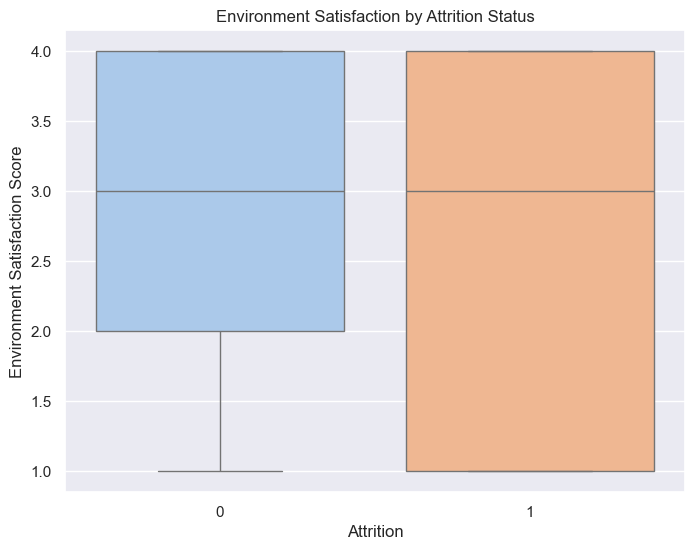

In [43]:
#create a box plot comparing job satisfaction scores between those who left and those who stayed
plt.figure(figsize=(8, 6))
sb.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=hr_attrition_num, palette='pastel')

plt.title('Environment Satisfaction by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction Score')
plt.show()

### 7. Do NumCompaniesWorked and attrition have a correlation?

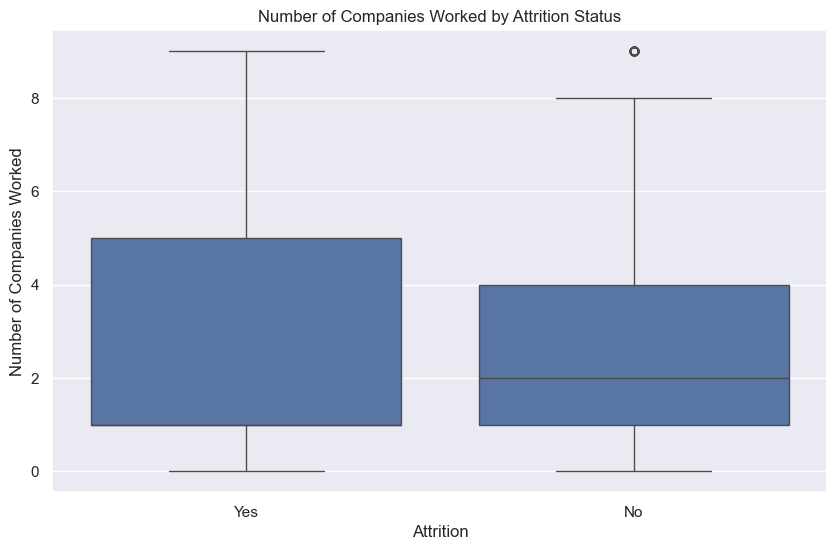

In [44]:
#set style of plot
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6)) 
sb.boxplot(x='Attrition', y='NumCompaniesWorked', data=hr)

plt.title('Number of Companies Worked by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')
plt.show()

## IV. Prepare the data for Machine Learning algorithms.

### 0. Preliminary work on the dataset

Note: Some of this was already done in III

In [45]:
hr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   int64   
 2   DailyRate                          1470 non-null   int64   
 3   DistanceFromHome                   1470 non-null   int64   
 4   Education                          1470 non-null   int64   
 5   EmployeeCount                      1470 non-null   int64   
 6   EmployeeNumber                     1470 non-null   int64   
 7   EnvironmentSatisfaction            1470 non-null   int64   
 8   Gender                             1470 non-null   int64   
 9   HourlyRate                         1470 non-null   int64   
 10  JobInvolvement                     1470 non-null   int64   
 11  JobLevel                           1470 non

Let's take care of the new boolean columns

In [46]:
#filter columns of dtype 'boolean'
boolean_columns = hr_num.select_dtypes(include=['bool']).columns

for column in boolean_columns:
    print(f"Value counts for {column}:")
    print(hr_num[column].value_counts())
    print("\n")
    
#print so I can just copy and paste for the next cell
for column in boolean_columns:
    print(f"'{column}', ")

Value counts for BusinessTravel_Non-Travel:
BusinessTravel_Non-Travel
False    1320
True      150
Name: count, dtype: int64


Value counts for BusinessTravel_Travel_Frequently:
BusinessTravel_Travel_Frequently
False    1193
True      277
Name: count, dtype: int64


Value counts for BusinessTravel_Travel_Rarely:
BusinessTravel_Travel_Rarely
True     1043
False     427
Name: count, dtype: int64


Value counts for Department_Human Resources:
Department_Human Resources
False    1407
True       63
Name: count, dtype: int64


Value counts for Department_Research & Development:
Department_Research & Development
True     961
False    509
Name: count, dtype: int64


Value counts for Department_Sales:
Department_Sales
False    1024
True      446
Name: count, dtype: int64


Value counts for EducationField_Human Resources:
EducationField_Human Resources
False    1443
True       27
Name: count, dtype: int64


Value counts for EducationField_Life Sciences:
EducationField_Life Sciences
False    864
T

In [47]:
#id boolean columns
bool_cols = [col for col in hr_num.columns if hr_num[col].dtype == 'bool']
print("Boolean columns:", bool_cols)

# Convert boolean columns to ints
for col in bool_cols:
    hr_num[col] = hr_num[col].astype(int)

#print the data types of the columns to verify
print(hr_num[bool_cols].dtypes)

print(hr_num[bool_cols].head())


Boolean columns: ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
BusinessTravel_Non-Travel            int32
BusinessTravel_Travel_Frequently     int32
BusinessTravel_Travel_Rarely         int32
Department_Human Resources           int32
Department_Research & Development    int32
Department_Sales                     int32
EducationField_Hum

In [48]:
hr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   int64   
 2   DailyRate                          1470 non-null   int64   
 3   DistanceFromHome                   1470 non-null   int64   
 4   Education                          1470 non-null   int64   
 5   EmployeeCount                      1470 non-null   int64   
 6   EmployeeNumber                     1470 non-null   int64   
 7   EnvironmentSatisfaction            1470 non-null   int64   
 8   Gender                             1470 non-null   int64   
 9   HourlyRate                         1470 non-null   int64   
 10  JobInvolvement                     1470 non-null   int64   
 11  JobLevel                           1470 non

In [49]:
#at different points one or both of these are not found. Comment/Uncomment as necessary

if 'DistanceFromHome_Max_Over25_Only' in hr_num.columns:
  hr_num = hr_num.drop("DistanceFromHome_Max_Over25_Only", axis=1)
  
if 'IncomeBin' in hr_num.columns:
  hr_num = hr_num.drop("IncomeBin", axis=1)

Add the row index as the ID

In [50]:
#Check if 'ID' column already exists and add it if not
if 'ID' not in hr_num.columns:
    #Reset index to make index a column
    hr_num.reset_index(inplace=True)

    #Rename index column to ID
    hr_num.rename(columns={'index': 'ID'}, inplace=True)
    hr_num['ID'] = hr_num.index

    #Reorder columns to make ID the first column
    cols = hr_num.columns.tolist()  #Creates a list of all columns
    cols = cols[-1:] + cols[:-1]  #Reorders the list by moving the last element (ID) to the first position
    hr_num = hr_num[cols]

hr_num.head()


MaritalStatus_Single  ID  Age  Attrition  DailyRate  DistanceFromHome  \
0                     1   0   41          1       1102                 1   
1                     0   1   49          0        279                 8   
2                     1   2   37          1       1373                 2   
3                     0   3   33          0       1392                 3   
4                     0   4   27          0        591                 2   

   Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2              1               1                        2  ...   
1          1              1               2                        3  ...   
2          2              1               4                        4  ...   
3          4              1               5                        4  ...   
4          1              1               7                        1  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  MaritalStatus_Married  
0                             0                       0                      0  
1                             0                       0                      1  
2                             0                       0                      0  
3                             0                       0                      1  
4                             0                       0                      1  

[5 rows x 54 columns]

In [51]:
#Remove duplicate columns but keep the first occurrence
hr_num = hr_num.loc[:, ~hr_num.columns.duplicated()]

#Clean up duplicate ID columns and ensure ID is first
hr_num = hr_num.loc[:, ~hr_num.columns.duplicated()]
if hr_num.columns[0] != 'ID':
    id_col = hr_num.pop('ID')  #Safely remove and store the ID column
    hr_num.insert(0, 'ID', id_col)  #Insert it back at the first position

#Safely move MaritalStatus_Single to the end without dropping it
if 'MaritalStatus_Single' in hr_num.columns:
    cols = [col for col in hr_num.columns if col != 'MaritalStatus_Single']  #All columns except MaritalStatus_Single
    cols.append('MaritalStatus_Single')  #Add MaritalStatus_Single at the end
    hr_num = hr_num[cols]
    
hr_num.head()

ID  Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   0   41          1       1102                 1          2              1   
1   1   49          0        279                 8          1              1   
2   2   37          1       1373                 2          2              1   
3   3   33          0       1392                 3          4              1   
4   4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1                        2       1  ...   
1               2                        3       0  ...   
2               4                        4       0  ...   
3               5                        4       1  ...   
4               7                        1       0  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 54 columns]

### 1. Split into a Training Set and a Test Set

In [52]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = hr_num.drop(['Attrition', 'ID',               
'DistanceFromHome',
'JobRole_Sales Representative',
'RelationshipSatisfaction',
'YearsWithCurrManager',
'YearsAtCompany',
'EducationField_Technical Degree',
'MaritalStatus_Divorced',
'EmployeeNumber',
'EducationField_Medical',
'NumCompaniesWorked',
'YearsSinceLastPromotion',
'TrainingTimesLastYear',
'Education',
'HourlyRate',
'JobRole_Laboratory Technician',
'DailyRate',
'MaritalStatus_Married',
'Gender',
'WorkLifeBalance',
'MonthlyRate',
'PercentSalaryHike',
'BusinessTravel_Non-Travel',
'JobRole_Manufacturing Director',
'Department_Research & Development',
'EducationField_Life Sciences',
'EmployeeCount',
'PerformanceRating',
'StandardHours',
'Department_Human Resources',
'EducationField_Human Resources',
'EducationField_Other',
'JobRole_Healthcare Representative',
'JobRole_Human Resources',
'JobRole_Manager',
'YearsInCurrentRole',
'EnvironmentSatisfaction',
'JobSatisfaction',
'StockOptionLevel',
'MaritalStatus_Single',
'JobRole_Research Director',
 ], axis=1)  # X is all columns except 'Attrition' and 'ID' and below a certain point in feature_importances (descending order)
y = hr_num['Attrition']              # y is the target column

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, stratify=y, random_state = 9)
print ("The Training set has {} samples.".format(X_train.shape[0]))
print ("The Testing set has {} samples.".format(X_test.shape[0]))

#Apply SMOTE
smote = SMOTE(random_state=9)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape {y_train.shape}")
print(f"Resampled dataset shape {y_res.shape}")

X_train = X_res
y_train = y_res

The Training set has 1176 samples.
The Testing set has 294 samples.
Original dataset shape (1176,)
Resampled dataset shape (1972,)


### 2. Create a Preprocessing and Training Pipeline

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

# Create a pipeline with a scaler and a classifier
pipeline_xgboost = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with a scaler and a RandomForest classifier
pipeline_randomforest = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=9, class_weight='balanced'))
])


In [55]:
from sklearn.svm import SVC

# Create a pipeline with a scaler and an SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=9, probability=True))
])

In [56]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression classifier
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=9))
])

#### 3. Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()

param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.2, 0.3, 0.4],
    'n_estimators': [300, 350, 400],
    'subsample': [0.7, 0.8, 0.9]
}

#best parameters for re-runs, comment over later
# param_grid = {
#     'max_depth': [7],
#     'learning_rate': [0.4],
#     'n_estimators': [400],
#     'subsample': [0.8]
# }

#Set up GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='recall', cv=3, verbose=1)
xgb_grid_search.fit(X_train, y_train)

#Extract the best parameters and score
xgb_best_params = xgb_grid_search.best_params_
xbg_best_score = xgb_grid_search.best_score_

print("Best XBG Recall:",(xbg_best_score))
print("Best XGB parameters:", xgb_best_params)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


Best XBG Recall: 0.8519874218499024
Best XGB parameters: {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}


In [58]:
from sklearn.ensemble import RandomForestRegressor

#Create a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=9)

# Define the parameter grid
param_grid = {
    'n_estimators': [160, 175, 200, 225, 250],  # Number of trees in the forest
    'max_depth': [None, 2, 3],   # Maximum depth of the tree
    'min_samples_split': [2, 3, 4], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 3, 4]    # Minimum number of samples required to be at a leaf node
}

#best parameters for re-runs, comment over later
# param_grid = {
#     'n_estimators': [175],  # Number of trees in the forest
#     'max_depth': [None],   # Maximum depth of the tree
#     'min_samples_split': [2], # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [2]    # Minimum number of samples required to be at a leaf node
# }

#Set up GridSearchCV to find the best parameters
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

#Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

#Extract the best parameters and score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_


print("Best RF MSE (negated):", rf_best_score) #lower scores are better
print("Best RF parameters:", rf_best_params)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best RF MSE (negated): -0.19413136640235681
Best RF parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}


In [59]:
#Create a SVC object
svm_model = SVC(random_state=9)

# Define the parameter grid for SVC
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf', 'linear'],  # Type of SVM kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}
#comment this out later
# param_grid_svm = {
#     'C': [0.1],  # Regularization parameter
#     'kernel': ['linear'],  # Type of SVM kernel
#     'gamma': ['scale']  # Kernel coefficient
# }

#Set up GridSearchCV to find the best parameters for SVC
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='recall', cv=3, verbose=1)

#Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

#Extract the best parameters and score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Recall (SVM):", best_score_svm)
print("Best parameters (SVM):", best_params_svm)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Recall (SVM): 0.6795815108607014
Best parameters (SVM): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [60]:
#Create a LogisticRegression object
log_reg_model = LogisticRegression(random_state=9)

#Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  #Inverse of regularization strength
    'solver': ['liblinear']#,'newton-cg', 'lbfgs', 'sag']  # Algorithm to use in the optimization problem
}

#Set up GridSearchCV to find the best parameters for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_lr, scoring='recall', cv=3, verbose=1)

#Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

#Extract the best parameters and score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best LR Recall (Logistic Regression):", best_score_lr)
print("Best LR parameters (Logistic Regression):", best_params_lr)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best LR Recall (Logistic Regression): 0.7009075295920133
Best LR parameters (Logistic Regression): {'C': 100, 'solver': 'liblinear'}


#### 4. Retrieve the Best Parameters

Update Pipeline with Best Parameters

In [61]:
#pipeline_xgboost.set_params(**best_parameters)
#pipeline_xgboost.set_params(xgb_best_params)

xgb_best_params = {f"classifier__{k}": v for k, v in xgb_best_params.items()}

pipeline_xgboost.set_params(**xgb_best_params)

print("Updated pipeline parameters:")
print(pipeline_xgboost.get_params())

Updated pipeline parameters:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...))], 'verbose': False, 'scaler': StandardScaler(), 'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              col

In [62]:
#pipeline_randomforest.set_params(**best_parameters)
#pipeline_randomforest.set_params(rf_best_params)

rf_best_params = {f"classifier__{k}": v for k, v in rf_best_params.items()}

pipeline_randomforest.set_params(**rf_best_params)

print("Updated pipeline parameters:")
print(pipeline_randomforest.get_params())

Updated pipeline parameters:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=175, random_state=9))], 'verbose': False, 'scaler': StandardScaler(), 'classifier': RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=175, random_state=9), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'classifier__bootstrap': True, 'classifier__ccp_alpha': 0.0, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__max_leaf_nodes': None, 'classifier__max_samples': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__min_weight_fraction_leaf': 0.0, 'classifier__monotonic_cst': None, 'classifier__n_estimators': 175, 'classifier__n

In [63]:
#best_parameters = {'svm__' + key: val for key, val in best_params_svm.items()}

#pipeline_svm.set_params(**best_parameters)
#pipeline_svm.set_params(best_params_svm)

best_params_svm = {f"classifier__{k}": v for k, v in best_params_svm.items()}

pipeline_svm.set_params(**best_params_svm)

print("Updated pipeline parameters:")
print(pipeline_svm.get_params())

Updated pipeline parameters:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', SVC(C=0.1, kernel='linear', probability=True, random_state=9))], 'verbose': False, 'scaler': StandardScaler(), 'classifier': SVC(C=0.1, kernel='linear', probability=True, random_state=9), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'classifier__C': 0.1, 'classifier__break_ties': False, 'classifier__cache_size': 200, 'classifier__class_weight': None, 'classifier__coef0': 0.0, 'classifier__decision_function_shape': 'ovr', 'classifier__degree': 3, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'classifier__max_iter': -1, 'classifier__probability': True, 'classifier__random_state': 9, 'classifier__shrinking': True, 'classifier__tol': 0.001, 'classifier__verbose': False}


In [64]:
#best_parameters = grid_search_lr.best_params_

#pipeline_lr.set_params(best_params_lr)

best_params_lr = {f"classifier__{k}": v for k, v in best_params_lr.items()}

pipeline_xgboost.set_params(**best_params_lr)

print("Updated pipeline parameters:")
print(pipeline_lr.get_params())

Updated pipeline parameters:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', LogisticRegression(random_state=9))], 'verbose': False, 'scaler': StandardScaler(), 'classifier': LogisticRegression(random_state=9), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 100, 'classifier__multi_class': 'auto', 'classifier__n_jobs': None, 'classifier__penalty': 'l2', 'classifier__random_state': 9, 'classifier__solver': 'lbfgs', 'classifier__tol': 0.0001, 'classifier__verbose': 0, 'classifier__warm_start': False}


## V. Select a Model and Train It

#### 1. Train model using the pipeline

In [65]:
pipeline_xgboost.fit(X_train, y_train)

c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(C=100, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.4,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [66]:
pipeline_randomforest.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=175,
                                        random_state=9))])

In [67]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=9))])

In [68]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=9))])

#### 2. Get Accuracy and Recall Cross-Validation Scores

In [69]:
from sklearn.model_selection import cross_val_score

scores_acc_xgb = cross_val_score(pipeline_xgboost, X, y, cv=5, scoring='accuracy')
print("XGBoost Accuracy Cross-validated scores:", scores_acc_xgb)
print("Average score:", scores_acc_xgb.mean())

c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.p

XGBoost Accuracy Cross-validated scores: [0.82993197 0.84353741 0.83333333 0.81972789 0.82312925]
Average score: 0.8299319727891158


In [70]:
from sklearn.model_selection import cross_val_score

scores_recall_xgb = cross_val_score(pipeline_xgboost, X, y, cv=5, scoring='recall')
print("XGBoost Recall Cross-validated scores:", scores_recall_xgb)
print("Average score:", scores_recall_xgb.mean())

c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\JB\CMPS490\.venv\Lib\site-packages\xgboost\core.p

XGBoost Recall Cross-validated scores: [0.33333333 0.33333333 0.34042553 0.21276596 0.34042553]
Average score: 0.3120567375886525


In [71]:
from sklearn.model_selection import cross_val_score

scores_acc_rf = cross_val_score(pipeline_randomforest, X, y, cv=5, scoring='accuracy')
print("Random Forest Accuracy Cross-validated scores:", scores_acc_rf)
print("Average score:", scores_acc_rf.mean())

Random Forest Accuracy Cross-validated scores: [0.8537415  0.84013605 0.8537415  0.84693878 0.87755102]
Average score: 0.8544217687074831


In [72]:
from sklearn.model_selection import cross_val_score

scores_recall_rf = cross_val_score(pipeline_randomforest, X, y, cv=5, scoring='recall')
print("Random Forest Recall Cross-validated scores:", scores_recall_rf)
print("Average score:", scores_recall_rf.mean())

Random Forest Recall Cross-validated scores: [0.33333333 0.35416667 0.44680851 0.31914894 0.44680851]
Average score: 0.3800531914893616


In [73]:
from sklearn.model_selection import cross_val_score

scores_acc_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring='accuracy')
print("SVM Accuracy Cross-validated scores:", scores_acc_svm)
print("Average score:", scores_acc_svm.mean())

SVM Accuracy Cross-validated scores: [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Average score: 0.8387755102040817


In [74]:
from sklearn.model_selection import cross_val_score

scores_recall_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring='recall')
print("SVM Recall Cross-validated scores:", scores_recall_svm)
print("Average score:", scores_recall_svm.mean())

SVM Recall Cross-validated scores: [0. 0. 0. 0. 0.]
Average score: 0.0


In [75]:
from sklearn.model_selection import cross_val_score

scores_lr_acc = cross_val_score(pipeline_lr, X, y, cv=5, scoring='accuracy')
print("LR Accuracy Cross-validated scores:", scores_lr_acc)
print("Average score:", scores_lr_acc.mean())

LR Accuracy Cross-validated scores: [0.86734694 0.86394558 0.8537415  0.8537415  0.85034014]
Average score: 0.8578231292517007


In [76]:
from sklearn.model_selection import cross_val_score

scores_recall_lr = cross_val_score(pipeline_lr, X, y, cv=5, scoring='recall')
print("LR Recall Cross-validated scores:", scores_recall_lr)
print("Average score:", scores_recall_lr.mean())

LR Recall Cross-validated scores: [0.20833333 0.27083333 0.17021277 0.14893617 0.19148936]
Average score: 0.1979609929078014


## VI. Fine-tune Your Model

#### 1. Evaluate model's performance on the test set

Note: I know I do not have to check threshold scores manually. I will change this on my personal revision.

In [77]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score, recall_score

y_pred_xgb = pipeline_xgboost.predict(X_test)
y_proba_xgb = pipeline_xgboost.predict_proba(X_test)[:, 1]  #Get probability scores for the positive class

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoost f1_score", f1_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
#Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

#Print out the values
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

y_pred2_xgb = pipeline_xgboost.predict(X_train)

print("XGBoost X_Train Accuracy:", accuracy_score(y_train, y_pred2_xgb))
print("XGBoost X_Train Recall:", recall_score(y_train, y_pred2_xgb))


# Define a new threshold
#threshold = 0.18  # Lower threshold may increase recall

# Convert probabilities to class predictions based on the new threshold
# y_new_pred = np.where(y_proba > 0.18, 1, 0)
# print("XGBoost With 0.18 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("XGBoost With 0.18 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("XGBoost With 0.18 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("XGBoost With 0.18 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.2, 1, 0)
# print("XGBoost With 0.2 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("XGBoost With 0.2 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("XGBoost With 0.2 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("XGBoost With 0.2 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.25, 1, 0)
# print("XGBoost With 0.25 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("XGBoost With 0.25 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("XGBoost With 0.25 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("XGBoost With 0.25 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > .05, 1, 0)
# print("XGBoost With 0.05 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("XGBoost With 0.05 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("XGBoost With 0.05 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("XGBoost With 0.05 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > .01, 1, 0)
# print("XGBoost With 0.01 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("XGBoost With 0.01 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("XGBoost With 0.01 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("XGBoost With 0.01 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

y_new_pred_xgb = np.where(y_proba_xgb > .001, 1, 0)
print("XGBoost With 0.001 Threshold Recall:", recall_score(y_test, y_new_pred_xgb))
print("XGBoost With 0.001 Threshold Accuracy:", accuracy_score(y_test, y_new_pred_xgb))
print("XGBoost With 0.001 Threshold Precision:", precision_score(y_test, y_new_pred_xgb))
print("XGBoost With 0.001 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred_xgb))

#0.001 performs the best for our purposes
y_pred_xgb = y_new_pred_xgb



XGBoost Accuracy: 0.7619047619047619
XGBoost Recall: 0.3617021276595745
XGBoost Precision: 0.2982456140350877
XGBoost f1_score 0.3269230769230769
XGBoost ROC AUC: 0.6205530192092342
XGBoost Confusion Matrix:
 [[207  40]
 [ 30  17]]
TN: 207, FP: 40, FN: 30, TP: 17
XGBoost X_Train Accuracy: 0.9994929006085193
XGBoost X_Train Recall: 1.0
XGBoost With 0.001 Threshold Recall: 0.7446808510638298
XGBoost With 0.001 Threshold Accuracy: 0.3843537414965986
XGBoost With 0.001 Threshold Precision: 0.1715686274509804
XGBoost With 0.001 Threshold Confusion Matrix:
 [[ 78 169]
 [ 12  35]]


In [78]:
y_pred_rf = pipeline_randomforest.predict(X_test)
y_proba_rf = pipeline_randomforest.predict_proba(X_test)[:, 1]  #Get probability scores for the positive class

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest f1_score", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Convert probabilities to class predictions based on the new threshold
# y_new_pred = np.where(y_proba > 0.12, 1, 0)
# print("Random Forest With 0.12 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("Random Forest With 0.12 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("Random Forest With 0.12 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("Random Forest With 0.12 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.17, 1, 0)
# print("Random Forest With 0.17 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("Random Forest With 0.17 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("Random Forest With 0.17 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("Random Forest With 0.17 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.18, 1, 0)
# print("Random Forest With 0.18 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("Random Forest With 0.18 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("Random Forest With 0.18 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("Random Forest With 0.18 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.2, 1, 0)
# print("Random Forest With 0.2 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("Random Forest With 0.2 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("Random Forest With 0.2 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("Random Forest With 0.2 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.21, 1, 0)
# print("Random Forest With 0.21 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("Random Forest With 0.21 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("Random Forest With 0.21 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("Random Forest With 0.21 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

y_new_pred_rf = np.where(y_proba_rf > 0.22, 1, 0)
print("Random Forest With 0.22 Threshold Recall:", recall_score(y_test, y_new_pred_rf))
print("Random Forest With 0.22 Threshold Accuracy:", accuracy_score(y_test, y_new_pred_rf))
print("Random Forest With 0.22 Threshold Precision:", precision_score(y_test, y_new_pred_rf))
print("Random Forest With 0.22 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred_rf))

#0.22 performs the best for our purposes
y_pred_rf = y_new_pred_rf

Random Forest Accuracy: 0.7619047619047619
Random Forest Recall: 0.3191489361702128
Random Forest Precision: 0.2830188679245283
Random Forest f1_score 0.3
Random Forest ROC AUC: 0.6357136704281162
Random Forest Confusion Matrix:
 [[209  38]
 [ 32  15]]
Random Forest With 0.22 Threshold Recall: 0.7446808510638298
Random Forest With 0.22 Threshold Accuracy: 0.46938775510204084
Random Forest With 0.22 Threshold Precision: 0.19553072625698323
Random Forest With 0.22 Threshold Confusion Matrix:
 [[103 144]
 [ 12  35]]


In [79]:
y_pred_svm = pipeline_svm.predict(X_test)
y_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]  #Get probability scores for the positive class

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM f1_score", f1_score(y_test, y_pred_svm))
print("SVM ROC AUC:", roc_auc_score(y_test, y_proba_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

#Convert probabilities to class predictions based on the new threshold
# y_new_pred = np.where(y_proba > 0.17, 1, 0)
# print("SVM With 0.17 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.17 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.17 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.17 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.18, 1, 0)
# print("SVM With 0.18 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.18 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.18 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.18 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.2, 1, 0)
# print("SVM With 0.2 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.2 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.2 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.2 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.21, 1, 0)
# print("SVM With 0.21 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.21 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.21 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.21 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.22, 1, 0)
# print("SVM With 0.22 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.22 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.22 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.22 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.27, 1, 0)
# print("SVM With 0.27 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("SVM With 0.27 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("SVM With 0.27 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("SVM With 0.27 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

y_new_pred_svm = np.where(y_proba_svm > 0.28, 1, 0)
print("SVM With 0.28 Threshold Recall:", recall_score(y_test, y_new_pred_svm))
print("SVM With 0.28 Threshold Accuracy:", accuracy_score(y_test, y_new_pred_svm))
print("SVM With 0.28 Threshold Precision:", precision_score(y_test, y_new_pred_svm))
print("SVM With 0.28 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred_svm))

#0.28 performs the best for our purposes
y_pred_svm = y_new_pred_svm

SVM Accuracy: 0.717687074829932
SVM Recall: 0.3617021276595745
SVM Precision: 0.24285714285714285
SVM f1_score 0.2905982905982906
SVM ROC AUC: 0.6575071065552589
SVM Confusion Matrix:
 [[194  53]
 [ 30  17]]
SVM With 0.28 Threshold Recall: 0.7872340425531915
SVM With 0.28 Threshold Accuracy: 0.4897959183673469
SVM With 0.28 Threshold Precision: 0.20903954802259886
SVM With 0.28 Threshold Confusion Matrix:
 [[107 140]
 [ 10  37]]


In [80]:
y_pred_lr = pipeline_lr.predict(X_test)
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]  #Get probability scores for the positive class

print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LR Recall:", recall_score(y_test, y_pred_lr))
print("LR Precision:", precision_score(y_test, y_pred_lr))
print("LR f1_score", f1_score(y_test, y_pred_lr))
print("LR ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

#Convert probabilities to class predictions based on the new threshold
#y_new_pred_lr = np.where(y_proba_lr > 0.21, 1, 0)
# print("LR With 0.21 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.21 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.21 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.21 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.25, 1, 0)
# print("LR With 0.25 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.25 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.25 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.25 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

y_new_pred_lr = np.where(y_proba_lr > 0.28, 1, 0)
print("LR With 0.28 Threshold Recall:", recall_score(y_test, y_new_pred_lr))
print("LR With 0.28 Threshold Accuracy:", accuracy_score(y_test, y_new_pred_lr))
print("LR With 0.28 Threshold Precision:", precision_score(y_test, y_new_pred_lr))
print("LR With 0.28 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred_lr))

# y_new_pred = np.where(y_proba > 0.29, 1, 0)
# print("LR With 0.29 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.29 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.29 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.29 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.3, 1, 0)
# print("LR With 0.3 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.3 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.3 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.3 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.31, 1, 0)
# print("LR With 0.31 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.31 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.31 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.31 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

# y_new_pred = np.where(y_proba > 0.32, 1, 0)
# print("LR With 0.32 Threshold Recall:", recall_score(y_test, y_new_pred))
# print("LR With 0.32 Threshold Accuracy:", accuracy_score(y_test, y_new_pred))
# print("LR With 0.32 Threshold Precision:", precision_score(y_test, y_new_pred))
# print("LR With 0.32 Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_new_pred))

#0.28 performs the best for our purposes
y_pred_lr = y_new_pred_lr

LR Accuracy: 0.6802721088435374
LR Recall: 0.44680851063829785
LR Precision: 0.23595505617977527
LR f1_score 0.3088235294117647
LR ROC AUC: 0.6685330347144457
LR Confusion Matrix:
 [[179  68]
 [ 26  21]]
LR With 0.28 Threshold Recall: 0.7872340425531915
LR With 0.28 Threshold Accuracy: 0.4965986394557823
LR With 0.28 Threshold Precision: 0.21142857142857144
LR With 0.28 Threshold Confusion Matrix:
 [[109 138]
 [ 10  37]]


#### 2. Use the Precision_Recall_Curve to Adjust the Decision Threshold

In [81]:
from sklearn.metrics import precision_recall_curve

y_proba_xgb = pipeline_xgboost.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_xgb)

#Find threshold that maximizes recall
idx = np.argmax(recall)
best_threshold = thresholds[idx]
print("XBG: Best threshold for maximum recall:", best_threshold)

#Apply custom threshold
y_pred_adjusted = (y_proba_xgb >= best_threshold).astype(int)
print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))

XBG: Best threshold for maximum recall: 3.7198504e-07
Adjusted Recall: 1.0


In [82]:
from sklearn.metrics import precision_recall_curve

y_proba_rf = pipeline_randomforest.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

#Find threshold that maximizes recall
idx = np.argmax(recall)
best_threshold = thresholds[idx]
print("RF: Best threshold for maximum recall:", best_threshold)

#Apply custom threshold
y_pred_adjusted = (y_proba_rf >= best_threshold).astype(int)
print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))

RF: Best threshold for maximum recall: 0.002594346829640947
Adjusted Recall: 1.0


In [83]:
from sklearn.metrics import precision_recall_curve

y_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_svm)

#Find threshold that maximizes recall
idx = np.argmax(recall)
best_threshold = thresholds[idx]
print("SVM: Best threshold for maximum recall:", best_threshold)

#Apply custom threshold
y_pred_adjusted = (y_proba_rf >= best_threshold).astype(int)
print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))

SVM: Best threshold for maximum recall: 0.015685326793302035
Adjusted Recall: 0.9787234042553191


In [84]:
from sklearn.metrics import precision_recall_curve

y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_svm)

#Find threshold that maximizes recall
idx = np.argmax(recall)
best_threshold = thresholds[idx]
print("LR: Best threshold for maximum recall:", best_threshold)

#Apply custom threshold
y_pred_adjusted = (y_proba_rf >= best_threshold).astype(int)
print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))

LR: Best threshold for maximum recall: 0.015685326793302035
Adjusted Recall: 0.9787234042553191


#### 3. Discover Feature Importances

Features sorted by importance:
BusinessTravel_Travel_Frequently: 0.12453986704349518
JobRole_Research Scientist: 0.10981227457523346
EducationField_Marketing: 0.10743585228919983
JobInvolvement: 0.10073484480381012
JobLevel: 0.09243820607662201
BusinessTravel_Travel_Rarely: 0.08892837166786194
OverTime: 0.08535604178905487
JobRole_Sales Executive: 0.07558572292327881
TotalWorkingYears: 0.06309056282043457
Department_Sales: 0.05841293931007385
MonthlyIncome: 0.05332278832793236
Age: 0.040342509746551514
'BusinessTravel_Travel_Frequently',
'JobRole_Research Scientist',
'EducationField_Marketing',
'JobInvolvement',
'JobLevel',
'BusinessTravel_Travel_Rarely',
'OverTime',
'JobRole_Sales Executive',
'TotalWorkingYears',
'Department_Sales',
'MonthlyIncome',
'Age',


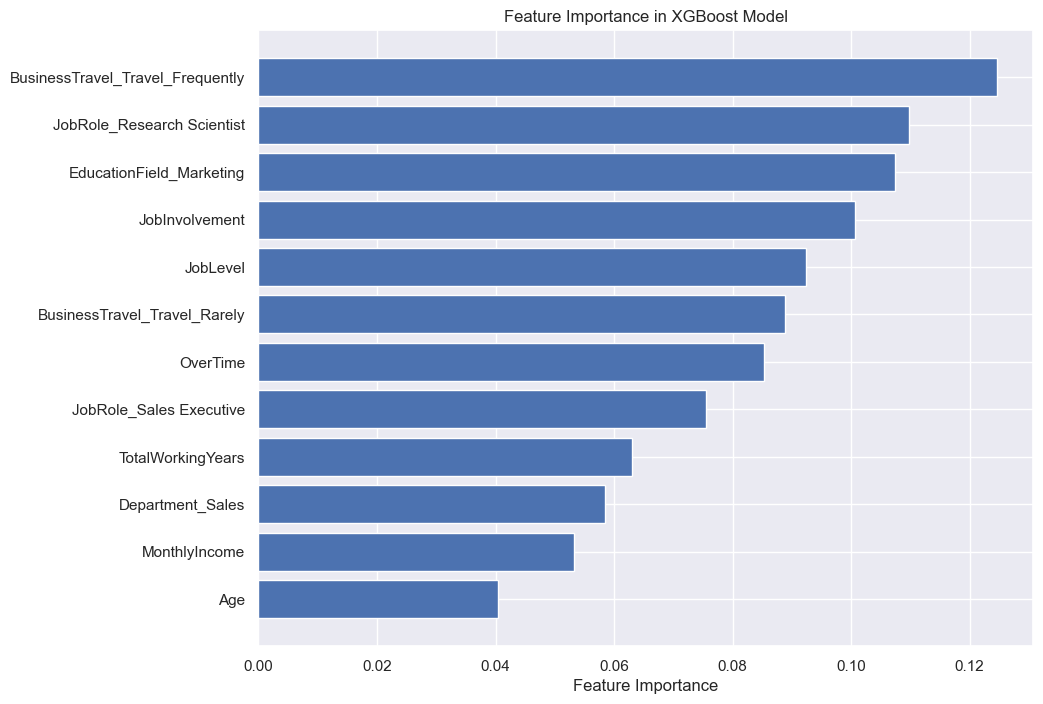

In [85]:
xgb_model = pipeline_xgboost.named_steps['classifier']
feature_importances = xgb_model.feature_importances_

#Pair feature names with their importance scores
feature_importance_pairs = list(zip(X.columns, feature_importances))

#Sort features by importance score, descending
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

#Print sorted feature importance
print("Features sorted by importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

for feature, importance in sorted_feature_importance:
    print(f"'{feature}',")


#Plot feature importances
plt.figure(figsize=(10, 8)) 
#Extract features and scores for plotting
features, scores = zip(*sorted_feature_importance)
plt.barh(range(len(scores)), scores, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  #Invert the y-axis to have the most important at the top
plt.show()


Features sorted by importance:
MonthlyIncome: 0.24839259013164386
TotalWorkingYears: 0.1691812169785214
Age: 0.1556420703972941
JobInvolvement: 0.09494692085348677
BusinessTravel_Travel_Rarely: 0.08836042244094491
JobLevel: 0.06789149508053233
OverTime: 0.04589982059717546
JobRole_Research Scientist: 0.043986560950807066
BusinessTravel_Travel_Frequently: 0.03540529442560845
Department_Sales: 0.021246728088920752
JobRole_Sales Executive: 0.016653104067872102
EducationField_Marketing: 0.012393775987192672
Features sorted by importance:
'MonthlyIncome',
'TotalWorkingYears',
'Age',
'JobInvolvement',
'BusinessTravel_Travel_Rarely',
'JobLevel',
'OverTime',
'JobRole_Research Scientist',
'BusinessTravel_Travel_Frequently',
'Department_Sales',
'JobRole_Sales Executive',
'EducationField_Marketing',


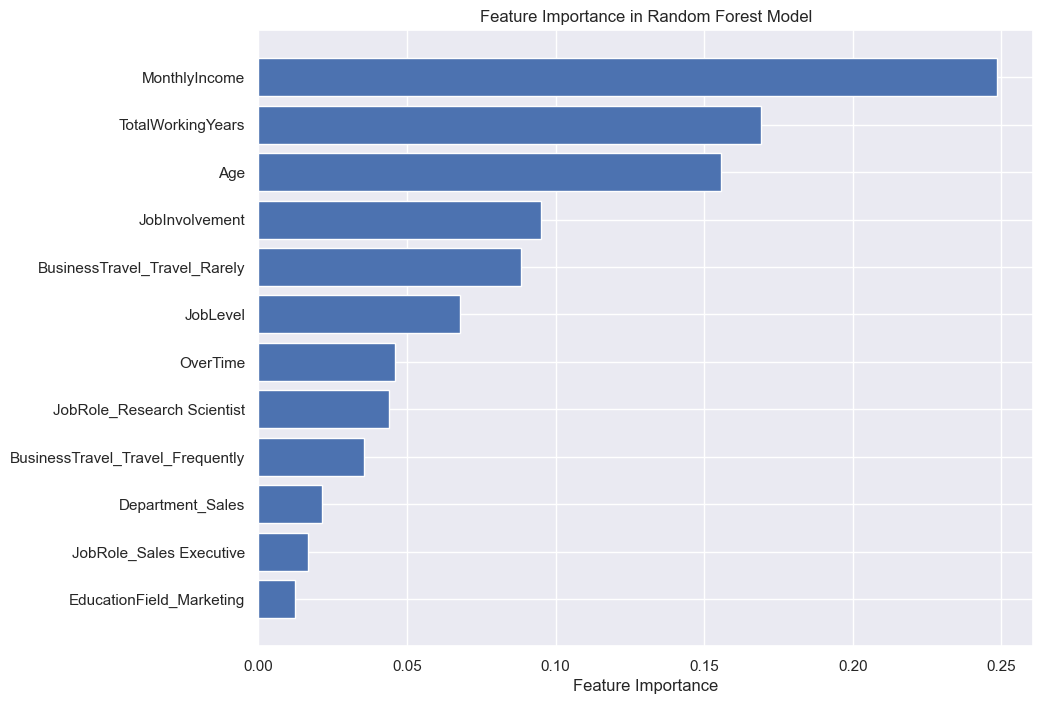

In [86]:
rf_model = pipeline_randomforest.named_steps['classifier']
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_pairs = list(zip(X.columns, feature_importances))

# Sort features by importance score, descending
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print sorted feature importance
print("Features sorted by importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    
print("Features sorted by importance:")
for feature, importance in sorted_feature_importance:
    print(f"'{feature}',")

# Plot feature importances
plt.figure(figsize=(10, 8))  # Width: 10 inches, Height: 8 inches
# Extract features and scores for plotting
features, scores = zip(*sorted_feature_importance)
plt.barh(range(len(scores)), scores, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()


Further evaluation

#### Mean Squared Error (MSE)

MSE measures the average squared difference between the predicted values and the actual values. 

The closer MSE is to zero, the better, as this indicates that the predicted values are very close to the actual values. A high MSE indicates that there is a large variance between predicted and actual values and that the model may be performing poorly on the test data.

#### R-squared (R²)

R², also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

R² ranges from 0 to 1 and is often expressed as a percentage. An R² of 1 indicates that the regression predictions perfectly fit the data. Values near 0 suggest that the model fails to accurately capture the target variable's variance. An R² close to 1 suggests that a significant proportion of the variance in the target variable is explained by the features.

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_xgb = pipeline_xgboost.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGB Mean Squared Error: {mse_xgb}")
print(f"XGB R-squared: {r2_xgb}")

XGB Mean Squared Error: 0.23809523809523808
XGB R-squared: -0.7727625118442587


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = pipeline_randomforest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RF Mean Squared Error: {mse_rf}")
print(f"RF R-squared: {r2_rf}")


RF Mean Squared Error: 0.23809523809523808
RF R-squared: -0.7727625118442587


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_svm = pipeline_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Mean Squared Error: {mse_svm}")
print(f"SVM R-squared: {r2_svm}")

SVM Mean Squared Error: 0.282312925170068
SVM R-squared: -1.101989835472478


In [90]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr = pipeline_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR R-squared: {r2_lr}")

LR Mean Squared Error: 0.3197278911564626
LR R-squared: -1.380566801619433


## VII. Present Your Solution

In [91]:
models_data = {
    'Model': ['XGBoost','Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy':         [accuracy_score(y_test, y_pred_xgb),      accuracy_score(y_test, y_pred_rf),      accuracy_score(y_test, y_pred_svm),     accuracy_score(y_test, y_pred_lr)],
    'Recall':           [recall_score(y_test, y_pred_xgb),        recall_score(y_test, y_pred_rf),        recall_score(y_test, y_pred_svm),       recall_score(y_test, y_pred_lr)],
    'Precision':        [precision_score(y_test, y_pred_xgb),     precision_score(y_test, y_pred_rf),     precision_score(y_test, y_pred_svm),    precision_score(y_test, y_pred_lr)],
    'F1 Score':         [f1_score(y_test, y_pred_xgb),            f1_score(y_test, y_pred_rf),            f1_score(y_test, y_pred_svm),           f1_score(y_test, y_pred_lr)],
    'ROC AUC':          [roc_auc_score(y_test, y_pred_xgb),       roc_auc_score(y_test, y_pred_rf),       roc_auc_score(y_test, y_pred_svm),      roc_auc_score(y_test, y_pred_lr)],
'Mean Squared Error' :  [mean_squared_error(y_test, y_pred_xgb),    mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svm), mean_squared_error(y_test, y_pred_lr)]
}

#Create DataFrame
performance_df = pd.DataFrame(models_data)

#Display the DataFrame
performance_df

#Style the DataFrame for better visualization
styled_df = performance_df.style.highlight_max(color='springgreen', subset=['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC', 'Mean Squared Error']) \
                                 .highlight_min(color='lightsalmon', subset=['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC', 'Mean Squared Error'])
styled_df


In [92]:
# cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# cm_rf = confusion_matrix(y_test, y_pred_rf)
# cm_svm = confusion_matrix(y_test, y_pred_svm)
# cm_lr = confusion_matrix(y_test, y_pred_lr)

# #Create DataFrame from confusion matrices
# cm_df_xgb = pd.DataFrame(cm_xgb, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
# cm_df_rf = pd.DataFrame(cm_rf, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
# cm_df_svm = pd.DataFrame(cm_svm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
# cm_df_lr = pd.DataFrame(cm_lr, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot

# # Plotting each matrix
# sb.heatmap(cm_df_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[0, 0])
# ax[0, 0].set_title('Confusion Matrix for XGBoost')
# ax[0, 0].set_xlabel('Predicted Labels')
# ax[0, 0].set_ylabel('True Labels')

# sb.heatmap(cm_df_rf, annot=True, fmt='d', cmap='Greens', ax=ax[0, 1])
# ax[0, 1].set_title('Confusion Matrix for Random Forest')
# ax[0, 1].set_xlabel('Predicted Labels')
# ax[0, 1].set_ylabel('True Labels')

# sb.heatmap(cm_df_svm, annot=True, fmt='d', cmap='Purples', ax=ax[1, 0])
# ax[1, 0].set_title('Confusion Matrix for SVM')
# ax[1, 0].set_xlabel('Predicted Labels')
# ax[1, 0].set_ylabel('True Labels')

# sb.heatmap(cm_df_lr, annot=True, fmt='d', cmap='Oranges', ax=ax[1, 1])
# ax[1, 1].set_title('Confusion Matrix for Logistic Regression')
# ax[1, 1].set_xlabel('Predicted Labels')
# ax[1, 1].set_ylabel('True Labels')

# plt.tight_layout()
# plt.show()

Retrain Model with Best Parameters on Full Dataset (If necessary)